In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats


C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Librerías de gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook


In [3]:
pip install --upgrade pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade scikit-learn

In [5]:
# Cargar los cuatro archivos CSV en cuatro DataFrames diferentes

df3 = pd.read_csv('df_3t_2016.csv')

df7 = pd.read_csv('df_3t_2017.csv')

df11= pd.read_csv('df_3t_2018.csv')

df15 = pd.read_csv('df_3t_2019.csv')


# Unir los DataFrames en uno solo
# Puedes elegir el método de unión (inner, outer, left, right) según tus necesidades
# En este caso, estoy usando concat para concatenar los DataFrames verticalmente (por filas)
df = pd.concat([df3,df7,df11,df15], axis=0, ignore_index=True)

# Mostrar el DataFrame resultante
print(df)


        gestion  trimestre  id_persona   depto peao  Genero  Edad  \
0          2016          3      582151  Potosi   Si  Hombre    26   
1          2016          3      582156  Potosi   Si  Hombre    22   
2          2016          3      582169  Potosi   Si  Hombre    28   
3          2016          3      582173  Potosi   Si  Hombre    49   
4          2016          3      582174  Potosi   Si   Mujer    50   
...         ...        ...         ...     ...  ...     ...   ...   
114304     2019          3     2739147  Tarija   No   Mujer    17   
114305     2019          3     2739150  Tarija   Si  Hombre    42   
114306     2019          3     2739151  Tarija   Si   Mujer    40   
114307     2019          3     2739175  Tarija   Si  Hombre    49   
114308     2019          3     2739177  Tarija   Si   Mujer    22   

                         s1_05                 Niv_Ed  \
0        JEFE O JEFA DEL HOGAR    Secundaria completa   
1        JEFE O JEFA DEL HOGAR    Primaria incompleta   


In [6]:
df.dtypes

gestion                int64
trimestre              int64
id_persona             int64
depto                 object
peao                  object
Genero                object
Edad                   int64
s1_05                 object
Niv_Ed                object
Est_Civ               object
Nacionalidad          object
ocupacion             object
Trabaja               object
Cont_Trab             object
condact               object
phrs                  object
Segundo_Trab          object
Aporta_Hog            object
tiempo_trab_meses      int64
ingresos             float64
pagos_extra           object
tasa_desempleo       float64
dtype: object

In [7]:
# Consulta para obtener los valores de tasa de desempleo por gestión
valores_tasa_desempleo = df.groupby('gestion')['tasa_desempleo'].unique()

# Imprimir los valores de tasa de desempleo por gestión
print(valores_tasa_desempleo)

gestion
2016    [3.8409132756398456]
2017      [4.02156334231806]
2018     [4.202312345634821]
2019     [3.688373124399438]
Name: tasa_desempleo, dtype: object


In [8]:
# Nuevos valores a reemplazar
nuevos_valores = {
    2016: 4.02,
    2017: 4.43,
    2018: 4.71,
    2019: 4.29
}

# Reemplazar los valores en la columna 'tasa_desempleo'
df['tasa_desempleo'] = df['gestion'].replace(nuevos_valores)

# Imprimir el DataFrame actualizado
print(df)

        gestion  trimestre  id_persona   depto peao  Genero  Edad  \
0          2016          3      582151  Potosi   Si  Hombre    26   
1          2016          3      582156  Potosi   Si  Hombre    22   
2          2016          3      582169  Potosi   Si  Hombre    28   
3          2016          3      582173  Potosi   Si  Hombre    49   
4          2016          3      582174  Potosi   Si   Mujer    50   
...         ...        ...         ...     ...  ...     ...   ...   
114304     2019          3     2739147  Tarija   No   Mujer    17   
114305     2019          3     2739150  Tarija   Si  Hombre    42   
114306     2019          3     2739151  Tarija   Si   Mujer    40   
114307     2019          3     2739175  Tarija   Si  Hombre    49   
114308     2019          3     2739177  Tarija   Si   Mujer    22   

                         s1_05                 Niv_Ed  \
0        JEFE O JEFA DEL HOGAR    Secundaria completa   
1        JEFE O JEFA DEL HOGAR    Primaria incompleta   


In [9]:
df = df[df['s1_05'] != 'EMPLEADA/O DEL HOGAR CAMA ADENTRO']

In [10]:
valores_s1_05= df['s1_05'].unique()
print(valores_s1_05)

['JEFE O JEFA DEL HOGAR' 'ESPOSA/O O CONVIVIENTE' 'HIJO/A O ENTENADO/A'
 'NIETO/NIETA' 'SUEGROS' 'YERNO O NUERA' 'PADRES' 'HERMANO/A O CUï¿½ADO'
 'OTRO PARIENTE' 'OTRO QUE NO ES PARIENTE'
 'PARIENTE DE LA EMPLEADA/O DEL HOGAR' 'HERMANO/A O CUÑADO/A'
 'HERMANO/A O CUÑDO/A']


In [11]:
df['s1_05'] = df['s1_05'].replace(['HERMANO/A O CUÑADO/A', 'HERMANO/A O CUï¿½DO', 'HERMANO/A O CUï¿½ADO', 'HERMANO/A O CUÑDO/A'], 'HERMANO/A O CUÑADO/A')
df['s1_05'] = df['s1_05'].replace(['PARIENTE DE LA EMPLEADA/O DEL HOGAR' ], 'OTRO QUE NO ES PARIENTE')
df['s1_05'] = df['s1_05'].replace(['PADRES', 'SUEGROS'], 'PADRES/SUEGROS')

In [12]:
valores_ocupacion= df['ocupacion'].unique()
print(valores_ocupacion)

['Operadores de Instalaciones y Maquinarias'
 'Trabajadores de Servicio y Vendedores'
 'Trabajadores de la Construcciï¿½n, Ind. Manufacturera y Otr'
 'Empleados de oficina' 'Profesionales cientificos e intelectuales'
 'Sin ocupacion' 'Trabajadores No Calificados'
 'Trabajadores en Agricultura, Pecuaria, Pesca y otros'
 'Tï¿½cnicos de Nivel Med' 'Directivos Adm. Pï¿½blica y Empres'
 'Fuerzas Armadas' 'Sin especificar' 'Persona de edad avanzada'
 'Trabajadores de la Construcción, Ind. Manufacturera y Otros'
 'Técnicos de Nivel Medio' 'Directivos Adm. Pública y Empresas'
 'Otro (Especifique)'
 'Ama de casa/ responsable de los quehaceres del hogar' 'Estudiante'
 'Trabajadores en Agricultura, Pecuaria,Pesca y otros']


In [13]:
df = df[~df['ocupacion'].isin(['Ama de casa/ responsable de los quehaceres del hogar', 'Estudiante', 'Persona de edad avanzada'])]

In [14]:
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores de la Construcciï¿½n, Ind. Manufacturera y Otr'], 'Trabajadores de la Construcción, Ind. Manufacturera y Otros')
df['ocupacion'] = df['ocupacion'].replace(['Jubilado / Benemï¿½ri'], 'Jubilado / Benemérito')
df['ocupacion'] = df['ocupacion'].replace(['Tï¿½cnicos de Nivel Med'], 'Técnicos de Nivel Medio')
df['ocupacion'] = df['ocupacion'].replace(['Directivos Adm. Pï¿½blica y Empres'], 'Directivos Adm. Pública y Empresas')
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores en Agricultura, Pecuaria, Pesca y otros'], 'Trabajadores en Agricultura, Pecuaria,Pesca y otros')
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores No Calificados', 'Otro (Especifique)','Técnicos de Nivel Medio','Sin especificar'], 'Otro')


In [15]:
valores_Est_civ= df['Est_Civ'].unique()
print(valores_Est_civ)

['CONVIVIENTE O CONCUBINO/A' 'CASADO/A' 'VIUDO/A' 'SEPARADO/A' 'SOLTERO/A'
 'DIVORCIADO/A']


In [16]:
df['Est_Civ'] = df['Est_Civ'].replace(['CONVIVIENTE O CONCUBINO/A'], 'CASADO/A')
df['Est_Civ'] = df['Est_Civ'].replace(['DIVORCIADO/A'], 'SEPARADO/A')

In [17]:
valores_Segundo_Trab= df['Segundo_Trab'].unique()
print(valores_Segundo_Trab)

['No' 'Sï' 'Si']


In [18]:
df['Segundo_Trab'] = df['Segundo_Trab'].replace(['Sï'], 'Si')

In [19]:
valores_Nacionalidad= df['Nacionalidad'].unique()
print(valores_Nacionalidad)

[0 1 '0' '1' ' ']


In [20]:
import numpy as np

# Diccionario de mapeo actualizado para incluir 0, 1 y espacio en blanco
nacionalidad_mapping = {'0': 'Boliviano/a', '1': 'Extranjero/a', 0: 'Boliviano/a', 1: 'Extranjero/a', ' ': np.nan}

# Aplicar el mapeo a la columna nacionalidad
df['Nacionalidad'] = df['Nacionalidad'].map(nacionalidad_mapping)

# Eliminar filas donde la nacionalidad es nula
df = df.dropna(subset=['Nacionalidad'])

In [21]:
valores_Nacionalidad= df['Nacionalidad'].unique()
print(valores_Nacionalidad)

['Boliviano/a' 'Extranjero/a']


In [22]:
df['Segundo_Trab'] = df['Segundo_Trab'].replace(['Sï'], 'Si')

In [23]:
valores_Niv_Ed= df['Niv_Ed'].unique()
print(valores_Niv_Ed)

['Secundaria completa' 'Primaria incompleta' 'Secundaria incompleta'
 'Primaria completa' 'Superior' 'Ninguno' 'Otros' 'Sin especificar' ' ']


In [24]:
df = df[(df['Niv_Ed'].str.strip() != '') & (df['Niv_Ed'] != 'Otros')]

In [25]:
valores_tiempo_trab_meses= df['tiempo_trab_meses'].unique()
print(valores_tiempo_trab_meses)

[  1818    121    726    242     55     33     66    968   1111    605
  24020  12010    484     44  18015   1089  26422  22819      0    847
     22  14412    363     11     82  25221     88  27623    247  36030
   3131  28824   3030   5454   1801    361  21618  54045  15613   3249
  48040  43236    127  37231    362  42035  31226  16814  30025   1325
    724    126    481   3618    601  36020   1205  18012  62452   1803
  24010   1010   2404  60050   1085  44437    241  19216    722    723
   4234  51643    602   2405   1203  24015     77    603  13211  57648
   2041    965  30015    963  38432     99   1515     41    123   6817
   1802   1807   2408    483  34829   1208   2763  32427    482   3003
    967   1804    246   1414    101   2401    366   1512   1328   1928
  26420   1084  33628  20417    844  40834   2406    486  21610   1805
   1201     32    964    962   2402   1808  27618    306   1919  24046
  21615    205   3606  39633    244    843  48034  49241    841  16811
   108

In [26]:
valores_peao= df['peao'].unique()
print(valores_peao)

['Si' 'No']


In [27]:
valores_peao= df['peao'].unique()
print(valores_peao)

['Si' 'No']


In [28]:
df.shape

(112622, 22)

In [29]:
# Convertir 'phrs' a tipo string
df['phrs'] = df['phrs'].astype(str)

# Reemplazar comas por puntos en la columna 'phrs'
df['phrs'] = df['phrs'].str.replace(',', '.')

# Convertir 'phrs' a tipo numérico
df['phrs'] = pd.to_numeric(df['phrs'], errors='coerce')

# Convertir 'ingresos' a tipo string
df['ingresos'] = df['ingresos'].astype(str)

# Reemplazar comas por puntos en la columna 'ingresos'
df['ingresos'] = df['ingresos'].str.replace(',', '.')

# Convertir 'ingresos' a tipo numérico
df['ingresos'] = pd.to_numeric(df['ingresos'], errors='coerce')

# Convertir 'tiempo_trab_meses' a tipo string
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].astype(str)

# Reemplazar comas por puntos en la columna 'tiempo_trab_meses'
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].str.replace(',', '.')

# Convertir 'tiempo_trab_meses' a tipo numérico
df['tiempo_trab_meses'] = pd.to_numeric(df['tiempo_trab_meses'], errors='coerce')

# Imprimir el DataFrame después de las conversiones
print(df)



        gestion  trimestre  id_persona   depto peao  Genero  Edad  \
0          2016          3      582151  Potosi   Si  Hombre    26   
1          2016          3      582156  Potosi   Si  Hombre    22   
2          2016          3      582169  Potosi   Si  Hombre    28   
3          2016          3      582173  Potosi   Si  Hombre    49   
4          2016          3      582174  Potosi   Si   Mujer    50   
...         ...        ...         ...     ...  ...     ...   ...   
114304     2019          3     2739147  Tarija   No   Mujer    17   
114305     2019          3     2739150  Tarija   Si  Hombre    42   
114306     2019          3     2739151  Tarija   Si   Mujer    40   
114307     2019          3     2739175  Tarija   Si  Hombre    49   
114308     2019          3     2739177  Tarija   Si   Mujer    22   

                         s1_05                 Niv_Ed    Est_Civ  ... Trabaja  \
0        JEFE O JEFA DEL HOGAR    Secundaria completa   CASADO/A  ...      Si   
1        

In [30]:
valores_phrs= df['phrs'].unique()
print(valores_phrs)

valores_tiempo_trab_meses= df['tiempo_trab_meses'].unique()
print(valores_tiempo_trab_meses)

valores_ingresos= df['ingresos'].unique()
print(valores_ingresos)

[ 98.    48.    50.    60.    30.    70.    40.    24.    56.    16.
   8.     0.    49.    42.    20.    36.    39.    22.5   21.    28.
  66.    25.    15.    44.    18.   105.    12.    27.    35.    63.
   4.    22.    75.    54.    32.    10.    72.    84.    33.     9.
  55.     2.    14.    49.5   45.     6.    77.     5.    23.75  51.
  38.5   90.    42.5    3.    78.   112.    27.5   60.5    7.    52.
  96.    87.5    1.    16.5   65.    71.5   64.    91.    19.5   57.
  26.    11.    59.5   64.75  80.    24.5   46.75  88.    13.   120.
  47.5   76.5  108.    17.5  102.    31.5  108.5   68.25  81.     8.5
  13.5   52.5   37.5    7.5   80.5   82.5   34.    31.25  10.5   25.5
  47.25  32.5   45.5   76.    52.25  57.75  68.    84.5   58.5   66.5
  62.5    1.5   41.25   2.5   69.    68.75   4.5   12.5   13.75  24.75
  30.25  12.75  63.25   3.5    9.5    6.5   73.5   34.5   40.5   20.25
  92.    61.5 ]
[  1818    121    726    242     55     33     66    968   1111    605
  24020  

In [31]:
df.info

<bound method DataFrame.info of         gestion  trimestre  id_persona   depto peao  Genero  Edad  \
0          2016          3      582151  Potosi   Si  Hombre    26   
1          2016          3      582156  Potosi   Si  Hombre    22   
2          2016          3      582169  Potosi   Si  Hombre    28   
3          2016          3      582173  Potosi   Si  Hombre    49   
4          2016          3      582174  Potosi   Si   Mujer    50   
...         ...        ...         ...     ...  ...     ...   ...   
114304     2019          3     2739147  Tarija   No   Mujer    17   
114305     2019          3     2739150  Tarija   Si  Hombre    42   
114306     2019          3     2739151  Tarija   Si   Mujer    40   
114307     2019          3     2739175  Tarija   Si  Hombre    49   
114308     2019          3     2739177  Tarija   Si   Mujer    22   

                         s1_05                 Niv_Ed    Est_Civ  ... Trabaja  \
0        JEFE O JEFA DEL HOGAR    Secundaria completa   CA

In [32]:
# Eliminar filas donde 'ingresos' es inferior a o superior a 15000 (sin incluir el valor 0)
df = df[((df['ingresos'] == 0) | ((df['ingresos'] > 0) & (df['ingresos'] >= 1996) & (df['ingresos'] <= 15000)))]

# Eliminar filas donde el valor es mayor a 300 incluir el valor 0)
df = df[(df['tiempo_trab_meses'].notnull()) & (df['tiempo_trab_meses'] >= 0) & (df['tiempo_trab_meses'] <= 300)]

In [33]:
df.shape

(39928, 22)

In [34]:
# Definir los límites para la categorización de ingresos
ingresos_bins = [-float('inf'), 1, 3000, 7000, float('inf')]
ingresos_labels = ['Sin ingresos', 'Bajo', 'Medio', 'Alto']

# Categorizar ingresos
df['ingresos_categoria'] = pd.cut(df['ingresos'], bins=ingresos_bins, labels=ingresos_labels, right=False)

# Definir los límites para la categorización de tiempo trabajado
tiempo_trab_bins = [-float('inf'), 1, 24, 96, float('inf')]
tiempo_trab_labels = ['Sin experiencia', 'Corto', 'Medio', 'Largo']

# Categorizar tiempo trabajado
df['tiempo_trab_categoria'] = pd.cut(df['tiempo_trab_meses'], bins=tiempo_trab_bins, labels=tiempo_trab_labels, right=False)

# Definir los límites para la categorización de phrs
phrs_bins = [-float('inf'), 0, 40, 50, float('inf')]
phrs_labels = ['Sin horas', 'Parcial', 'Completo', 'Extra']

# Categorizar 'phrs' y crear la nueva columna 'phrs_categoria'
df['phrs_categoria'] = pd.cut(df['phrs'], bins=phrs_bins, labels=phrs_labels, right=False)

# Asignar la categoría 'Sin horas' a las filas donde 'phrs' es nulo
df.loc[df['phrs']== 0, 'phrs_categoria'] = 'Sin horas'

df.head()


,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
1,2016,3,582156,Potosi,Si,Hombre,22,JEFE O JEFA DEL HOGAR,Primaria incompleta,CASADO/A,...,48.0,No,Si,121,2500.0,No,4.02,Bajo,Largo,Completo
3,2016,3,582173,Potosi,Si,Hombre,49,JEFE O JEFA DEL HOGAR,Primaria completa,CASADO/A,...,60.0,No,Si,242,2400.0,No,4.02,Bajo,Largo,Extra
4,2016,3,582174,Potosi,Si,Mujer,50,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,30.0,No,No,242,0.0,No,4.02,Sin ingresos,Largo,Parcial
5,2016,3,582184,Potosi,Si,Hombre,31,JEFE O JEFA DEL HOGAR,Primaria completa,CASADO/A,...,48.0,No,Si,55,6680.0,No,4.02,Medio,Medio,Completo
6,2016,3,582195,Potosi,Si,Hombre,28,JEFE O JEFA DEL HOGAR,Superior,CASADO/A,...,48.0,No,Si,33,3000.0,No,4.02,Medio,Medio,Completo


In [35]:
# Contar el número de casos en cada categoría para 'ingresos_categoria'
conteo_ingresos = df['ingresos_categoria'].value_counts()

# Mostrar los resultados para 'ingresos_categoria'
print("Conteo de casos para 'ingresos_categoria':")
print(conteo_ingresos)
print()

# Contar el número de casos en cada categoría para 'tiempo_trab_categoria'
conteo_tiempo_trab = df['tiempo_trab_categoria'].value_counts()

# Mostrar los resultados para 'tiempo_trab_categoria'
print("Conteo de casos para 'tiempo_trab_categoria':")
print(conteo_tiempo_trab)
print()

# Contar el número de casos en cada categoría para 'phrs_categoria'
conteo_phrs = df['phrs_categoria'].value_counts()

# Mostrar los resultados para 'phrs_categoria'
print("Conteo de casos para 'phrs_categoria':")
print(conteo_phrs)

Conteo de casos para 'ingresos_categoria':
ingresos_categoria
Medio           15140
Bajo            12093
Sin ingresos    11106
Alto             1589
Name: count, dtype: int64

Conteo de casos para 'tiempo_trab_categoria':
tiempo_trab_categoria
Largo              14392
Medio              12499
Corto               8607
Sin experiencia     4430
Name: count, dtype: int64

Conteo de casos para 'phrs_categoria':
phrs_categoria
Completo     16515
Parcial      11473
Extra         7595
Sin horas     4345
Name: count, dtype: int64


In [36]:
valores_ingresos_categoria= df['ingresos_categoria'].unique()
print(valores_ingresos_categoria)

['Bajo', 'Sin ingresos', 'Medio', 'Alto']
Categories (4, object): ['Sin ingresos' < 'Bajo' < 'Medio' < 'Alto']


In [37]:
valores_tiempo_trab_categoria= df['tiempo_trab_categoria'].unique()
print(valores_tiempo_trab_categoria)

['Largo', 'Medio', 'Sin experiencia', 'Corto']
Categories (4, object): ['Sin experiencia' < 'Corto' < 'Medio' < 'Largo']


In [38]:
# Reemplaza los ceros con valores nulos (NaN) en las columnas 
df['phrs'] = df['phrs'].replace(0, pd.NA)

# Reemplaza los ceros con valores nulos (NaN) en las columna ingresos
df['ingresos'] = df['ingresos'].replace(0, pd.NA)

# Reemplaza los ceros con valores nulos (NaN) en las columna tiempo_trab_meses
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].replace(0, pd.NA)


df.head()

,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
1,2016,3,582156,Potosi,Si,Hombre,22,JEFE O JEFA DEL HOGAR,Primaria incompleta,CASADO/A,...,48.0,No,Si,121,2500.0,No,4.02,Bajo,Largo,Completo
3,2016,3,582173,Potosi,Si,Hombre,49,JEFE O JEFA DEL HOGAR,Primaria completa,CASADO/A,...,60.0,No,Si,242,2400.0,No,4.02,Bajo,Largo,Extra
4,2016,3,582174,Potosi,Si,Mujer,50,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,30.0,No,No,242,<NA>,No,4.02,Sin ingresos,Largo,Parcial
5,2016,3,582184,Potosi,Si,Hombre,31,JEFE O JEFA DEL HOGAR,Primaria completa,CASADO/A,...,48.0,No,Si,55,6680.0,No,4.02,Medio,Medio,Completo
6,2016,3,582195,Potosi,Si,Hombre,28,JEFE O JEFA DEL HOGAR,Superior,CASADO/A,...,48.0,No,Si,33,3000.0,No,4.02,Medio,Medio,Completo


In [39]:
limite_inferior_ingresos = df['ingresos'].min()
limite_superior_ingresos = df['ingresos'].max()

limite_inferior_tiempo_trab_meses = df['tiempo_trab_meses'].min()
limite_superior_tiempo_trab_meses = df['tiempo_trab_meses'].max()

print("Límite inferior de ingresos:", limite_inferior_ingresos)
print("Límite superior de ingresos:", limite_superior_ingresos)

print("Límite inferior de tiempo_trab_meses:", limite_inferior_tiempo_trab_meses)
print("Límite superior de tiempo_trab_meses:", limite_superior_tiempo_trab_meses)


Límite inferior de ingresos: 1996.0
Límite superior de ingresos: 15000.0
Límite inferior de tiempo_trab_meses: 1
Límite superior de tiempo_trab_meses: 300


## Tratamiento de valores atipicos por el metodo del rango intercuartil

Tratamiento de valores atípicos  para la columna phrs, ingresos y tiempo_trab_meses

Existen valores atipicos que fueron borrados por el procedimiento

Eliminación por rango intercuartileo

IQR = Q3 - Q1

LI = Q1 - 1.5 * (IQR)

LS = Q3 + 1.5 * (IQR)

In [40]:
df.shape

(39928, 25)

In [41]:
import pandas as pd

# Supongamos que 'phrs' es la columna que quieres convertir y filtrar
columna_a_corregir = 'phrs'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1 = df['phrs'].quantile(q=0.25)
Q3 = df['phrs'].quantile(q=0.75)
IQR = Q3 - Q1

# Filtrar filas basadas en el rango intercuartílico
df_1 = df[~((df['phrs'] < (Q1 - 1.5 * IQR)) | (df['phrs'] > (Q3 + 1.5 * IQR)))].copy()



In [42]:
df_1.shape

(39071, 25)

In [43]:
columna_a_corregir_ingresos = 'tiempo_trab_meses'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1_ingresos = df['tiempo_trab_meses'].quantile(q=0.25)
Q3_ingresos = df['tiempo_trab_meses'].quantile(q=0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos

# Filtrar filas basadas en el rango intercuartílico para 'ingresos'
df_1= df_1[~((df_1['tiempo_trab_meses'] < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_1['tiempo_trab_meses'] > (Q3_ingresos + 1.5 * IQR_ingresos)))].copy()

In [44]:
df_1.shape

(38621, 25)

In [45]:
columna_a_corregir_ingresos = 'ingresos'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1_ingresos = df['ingresos'].quantile(q=0.25)
Q3_ingresos = df['ingresos'].quantile(q=0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos

# Filtrar filas basadas en el rango intercuartílico para 'ingresos'
df_1= df_1[~((df_1['ingresos'] < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_1['ingresos'] > (Q3_ingresos + 1.5 * IQR_ingresos)))].copy()

In [46]:
df_1.shape

(36894, 25)

In [47]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36894 entries, 1 to 114308
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                36894 non-null  int64   
 1   trimestre              36894 non-null  int64   
 2   id_persona             36894 non-null  int64   
 3   depto                  36894 non-null  object  
 4   peao                   36894 non-null  object  
 5   Genero                 36894 non-null  object  
 6   Edad                   36894 non-null  int64   
 7   s1_05                  36894 non-null  object  
 8   Niv_Ed                 36894 non-null  object  
 9   Est_Civ                36894 non-null  object  
 10  Nacionalidad           36894 non-null  object  
 11  ocupacion              36894 non-null  object  
 12  Trabaja                36894 non-null  object  
 13  Cont_Trab              36894 non-null  object  
 14  condact                36894 non-null  obj

In [48]:
import numpy as np

# Eliminar registros donde la edad es menor que el tiempo de trabajo en años y el tiempo de trabajo en años no es cero ni nulo
df_1 = df_1[(
    (df_1['Edad'] >= np.where(pd.isna(df_1['tiempo_trab_meses']), np.nan, df_1['tiempo_trab_meses'] / 12)) |
    (df_1['tiempo_trab_meses'].isna())
)]

# Mostrar las primeras filas del DataFrame resultante
df_1.head()



C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
1,2016,3,582156,Potosi,Si,Hombre,22,JEFE O JEFA DEL HOGAR,Primaria incompleta,CASADO/A,...,48.0,No,Si,121,2500.0,No,4.02,Bajo,Largo,Completo
3,2016,3,582173,Potosi,Si,Hombre,49,JEFE O JEFA DEL HOGAR,Primaria completa,CASADO/A,...,60.0,No,Si,242,2400.0,No,4.02,Bajo,Largo,Extra
4,2016,3,582174,Potosi,Si,Mujer,50,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,30.0,No,No,242,<NA>,No,4.02,Sin ingresos,Largo,Parcial
6,2016,3,582195,Potosi,Si,Hombre,28,JEFE O JEFA DEL HOGAR,Superior,CASADO/A,...,48.0,No,Si,33,3000.0,No,4.02,Medio,Medio,Completo
9,2016,3,582200,Potosi,Si,Mujer,44,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,24.0,No,Si,66,2250.0,No,4.02,Bajo,Medio,Parcial


In [49]:
df_1['peao'].value_counts()

peao
Si    31889
No     4262
Name: count, dtype: int64

In [50]:
df_1.shape

(36151, 25)

In [51]:
# Convertir 'phrs' a tipo string
df_1['phrs'] = df_1['phrs'].astype(str)

# Reemplazar comas por puntos en la columna 'phrs'
df_1['phrs'] = df_1['phrs'].str.replace(',', '.')

# Convertir 'phrs' a tipo numérico
df_1['phrs'] = pd.to_numeric(df_1['phrs'], errors='coerce')

# Convertir 'ingresos' a tipo string
df_1['ingresos'] = df_1['ingresos'].astype(str)

# Reemplazar comas por puntos en la columna 'ingresos'
df_1['ingresos'] = df_1['ingresos'].str.replace(',', '.')

# Convertir 'ingresos' a tipo numérico
df_1['ingresos'] = pd.to_numeric(df_1['ingresos'], errors='coerce')

# Convertir 'tiempo_trab_meses' a tipo string
df_1['tiempo_trab_meses'] = df_1['tiempo_trab_meses'].astype(str)

# Reemplazar comas por puntos en la columna 'tiempo_trab_meses'
df_1['tiempo_trab_meses'] = df_1['tiempo_trab_meses'].str.replace(',', '.')

# Convertir 'tiempo_trab_meses' a tipo numérico
df_1['tiempo_trab_meses'] = pd.to_numeric(df_1['tiempo_trab_meses'], errors='coerce')

# Imprimir el DataFrame después de las conversiones
print(df_1)


        gestion  trimestre  id_persona   depto peao  Genero  Edad  \
1          2016          3      582156  Potosi   Si  Hombre    22   
3          2016          3      582173  Potosi   Si  Hombre    49   
4          2016          3      582174  Potosi   Si   Mujer    50   
6          2016          3      582195  Potosi   Si  Hombre    28   
9          2016          3      582200  Potosi   Si   Mujer    44   
...         ...        ...         ...     ...  ...     ...   ...   
114302     2019          3     2739145  Tarija   Si  Hombre    40   
114303     2019          3     2739146  Tarija   Si   Mujer    40   
114304     2019          3     2739147  Tarija   No   Mujer    17   
114305     2019          3     2739150  Tarija   Si  Hombre    42   
114308     2019          3     2739177  Tarija   Si   Mujer    22   

                         s1_05                 Niv_Ed    Est_Civ  ...  phrs  \
1        JEFE O JEFA DEL HOGAR    Primaria incompleta   CASADO/A  ...  48.0   
3        JEFE

In [52]:
# Eliminar filas donde 'tiempo_trab_meses' está vacío pero 'phrs' tiene contenido
df_1 = df_1[~(df_1['tiempo_trab_meses'].isna() & df_1['phrs'].notna())]

In [53]:
df_1.shape

(36057, 25)

In [54]:
# Eliminar filas donde 'tiempo_trab_meses' está vacío pero 'phrs' tiene contenido
df_1 = df_1[~(df_1['tiempo_trab_meses'].notna() &df_1['tiempo_trab_meses'].notna() & df_1['phrs'].isna())]

In [55]:
df_1.shape

(36038, 25)

In [56]:
# Filtrar las filas
df_1 = df_1[~((df_1['ingresos'].isna()) & 
             (df_1['tiempo_trab_categoria'].isin(['Largo','Medio', 'Corto'])))]

In [57]:
# Filtrar las filas
df_1 = df_1[~((df_1['ingresos'].isna()) & 
             (df_1['phrs_categoria'].isin(['Completo', 'Extra', 'Parcial'])))]

In [58]:
# Guardar el DataFrame en un archivo CSV
df_1.to_csv('df_3t.csv', index=False)
 # El parámetro index=False evita que se escriba el índice en el archivo.

In [59]:
df_1.shape

(30085, 25)

# Analisis descriptivo
Variables numéricas
  

In [60]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,30085.000000,30085.0,3.008500e+04,30085.000000,25759.000000,25759.000000,25759.000000,30085.000000
mean,2017.863487,3.0,1.906618e+06,34.982317,43.455346,86.786521,3209.221900,4.361016
std,1.139755,0.0,7.547402e+05,11.854471,13.191679,79.833430,1038.919669,0.225839
min,2016.000000,3.0,5.821560e+05,14.000000,3.000000,1.000000,1996.000000,4.020000
25%,2017.000000,3.0,1.329985e+06,26.000000,40.000000,22.000000,2400.000000,4.290000
50%,2018.000000,3.0,2.014559e+06,33.000000,44.000000,60.000000,3000.000000,4.290000
75%,2019.000000,3.0,2.636932e+06,42.000000,48.000000,121.000000,3700.000000,4.430000
max,2019.000000,3.0,2.739177e+06,88.000000,75.000000,264.000000,6400.000000,4.710000


In [61]:
# Crea una lista de las variables numéricas
variables_numericas = ['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs', 'tasa_desempleo']

# Crea un DataFrame vacío para almacenar las estadísticas descriptivas
df_estadisticas = pd.DataFrame(columns=['Variable', 'Moda', 'Mediana', 'Media', 'Desviación estándar', 'Varianza', 'Coeficiente de variabilidad'])

# Calcula las estadísticas descriptivas para cada variable
for variable in variables_numericas:
    # Calcula la moda
    moda = df_1[variable].mode().iloc[0]

    # Calcula la mediana
    mediana = df_1[variable].median()

    # Calcula la media
    media = df_1[variable].mean()

    # Calcula la desviación estándar
    desviacion_estandar = df_1[variable].std()

    # Calcula la varianza
    varianza = desviacion_estandar**2

    # Calcula el coeficiente de variabilidad
    coef_variabilidad = (desviacion_estandar / media) * 100

    # Agrega las estadísticas a la tabla
    df_estadisticas = pd.concat([df_estadisticas, pd.DataFrame({
        'Variable': [variable],
        'Moda': [moda],
        'Mediana': [mediana],
        'Media': [media],
        'Desviación estándar': [desviacion_estandar],
        'Varianza': [varianza],
        'Coeficiente de variabilidad': [coef_variabilidad]
    })], ignore_index=True)

# Imprime la tabla
print(df_estadisticas.to_string(index=False))


         Variable    Moda  Mediana       Media  Desviación estándar     Varianza  Coeficiente de variabilidad
             Edad      25    33.00   34.982317            11.854471 1.405285e+02                    33.887037
tiempo_trab_meses   242.0    60.00   86.786521            79.833430 6.373376e+03                    91.988282
         ingresos  3000.0  3000.00 3209.221900          1038.919669 1.079354e+06                    32.372946
             phrs    48.0    44.00   43.455346            13.191679 1.740204e+02                    30.356861
   tasa_desempleo    4.29     4.29    4.361016             0.225839 5.100317e-02                     5.178582


C:\Users\win10\AppData\Local\Temp\ipykernel_15636\1069559067.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_estadisticas = pd.concat([df_estadisticas, pd.DataFrame({


<IPython.core.display.Javascript object>


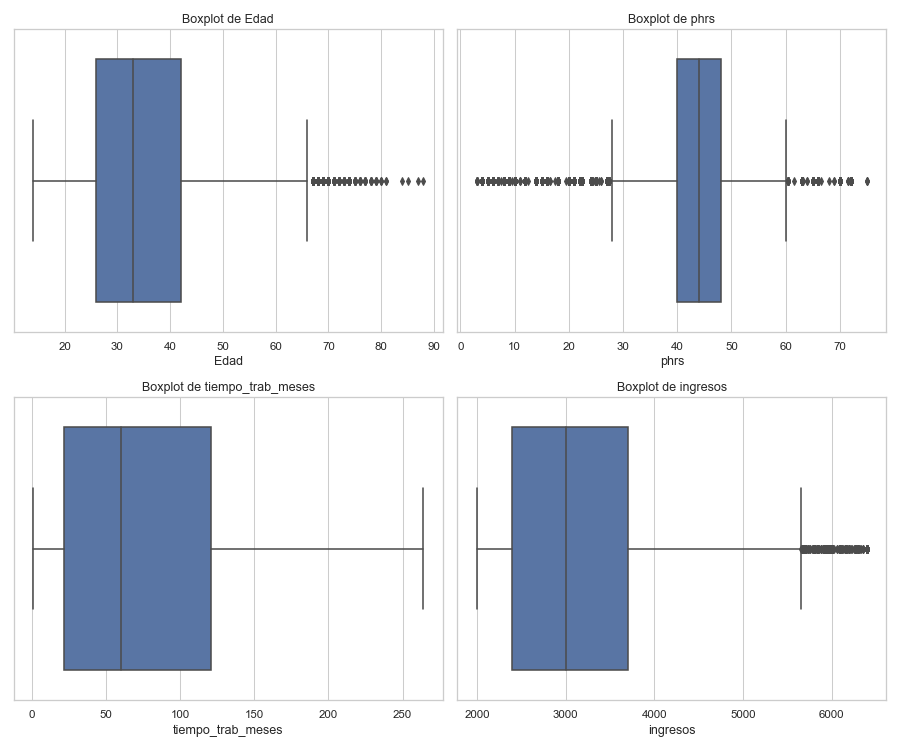

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Variables a incluir en los boxplots
variables_boxplot = ['Edad', 'phrs', 'tiempo_trab_meses', 'ingresos']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterar sobre las variables y dibujar boxplots
for i, variable in enumerate(variables_boxplot):
    sns.boxplot(x=df_1[variable], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {variable}')

# Ajustes de diseño
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


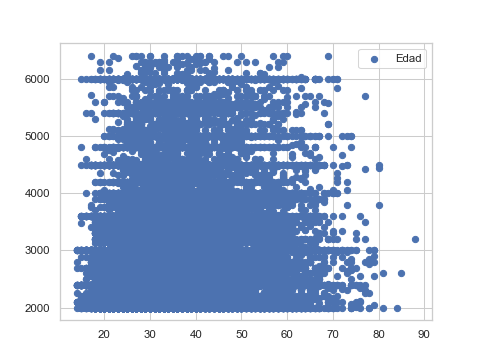

0.13958110051139253


In [63]:
# Crea un gráfico de dispersión
plt.figure()
plt.scatter(df_1['Edad'], df_1['ingresos'])

# Agrega una leyenda
plt.legend(['Edad', 'Ingresos'])

# Muestra el gráfico
plt.show()

# Copia el DataFrame para preservar el original
df_1_copia = df_1.copy()

# Elimina las filas con valores nulos en las columnas 'Edad' e 'Ingresos'
df_1_sin_nulos = df_1_copia.dropna(subset=['Edad', 'ingresos'])

# Calcula la correlación lineal
correlacion = np.corrcoef(df_1_sin_nulos['Edad'], df_1_sin_nulos['ingresos'])[0, 1]
print(correlacion)



<IPython.core.display.Javascript object>


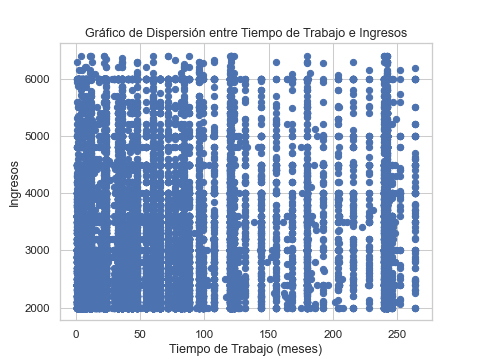

Correlación entre Tiempo de Trabajo e Ingresos: 0.08995370249672054


In [64]:
plt.figure()
plt.scatter(df_1_sin_nulos['tiempo_trab_meses'], df_1_sin_nulos['ingresos'])
plt.xlabel('Tiempo de Trabajo (meses)')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión entre Tiempo de Trabajo e Ingresos')
plt.show()

correlacion_tt_ingresos = np.corrcoef(df_1_sin_nulos['tiempo_trab_meses'], df_1_sin_nulos['ingresos'])[0, 1]
print("Correlación entre Tiempo de Trabajo e Ingresos:", correlacion_tt_ingresos)


<IPython.core.display.Javascript object>


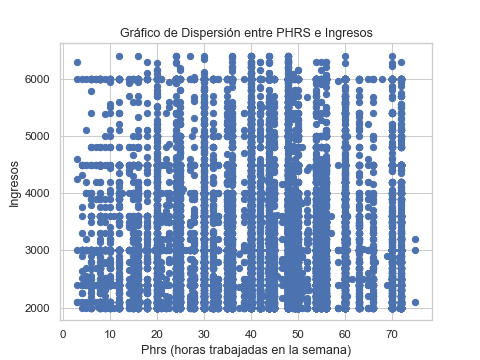

Correlación entre PHRS e Ingresos: -0.0012288203908108171


In [66]:
plt.figure()
plt.scatter(df_1_sin_nulos['phrs'], df_1_sin_nulos['ingresos'])
plt.xlabel('Phrs (horas trabajadas en la semana)')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión entre PHRS e Ingresos')
plt.show()

correlacion_phrs_ingresos = np.corrcoef(df_1_sin_nulos['phrs'], df_1_sin_nulos['ingresos'])[0, 1]
print("Correlación entre PHRS e Ingresos:", correlacion_phrs_ingresos)


In [70]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,30085.000000,30085.0,3.008500e+04,30085.000000,25759.000000,25759.000000,25759.000000,30085.000000
mean,2017.863487,3.0,1.906618e+06,34.982317,43.455346,86.786521,3209.221900,4.361016
std,1.139755,0.0,7.547402e+05,11.854471,13.191679,79.833430,1038.919669,0.225839
min,2016.000000,3.0,5.821560e+05,14.000000,3.000000,1.000000,1996.000000,4.020000
25%,2017.000000,3.0,1.329985e+06,26.000000,40.000000,22.000000,2400.000000,4.290000
50%,2018.000000,3.0,2.014559e+06,33.000000,44.000000,60.000000,3000.000000,4.290000
75%,2019.000000,3.0,2.636932e+06,42.000000,48.000000,121.000000,3700.000000,4.430000
max,2019.000000,3.0,2.739177e+06,88.000000,75.000000,264.000000,6400.000000,4.710000


<IPython.core.display.Javascript object>


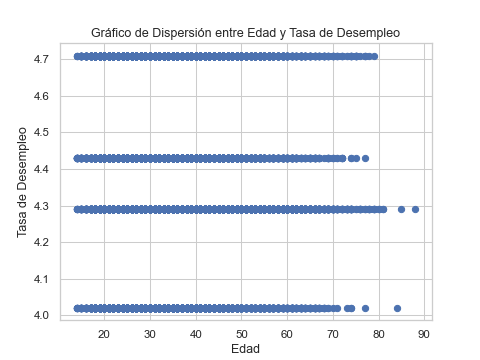

Correlación entre Edad y Tasa de Desempleo: -0.017134389422700406


In [68]:
plt.figure()
plt.scatter(df_1_sin_nulos['Edad'], df_1_sin_nulos['tasa_desempleo'])
plt.xlabel('Edad')
plt.ylabel('Tasa de Desempleo')
plt.title('Gráfico de Dispersión entre Edad y Tasa de Desempleo')
plt.show()

correlacion_edad_tasa_desempleo = np.corrcoef(df_1_sin_nulos['Edad'], df_1_sin_nulos['tasa_desempleo'])[0, 1]
print("Correlación entre Edad y Tasa de Desempleo:", correlacion_edad_tasa_desempleo)


<IPython.core.display.Javascript object>


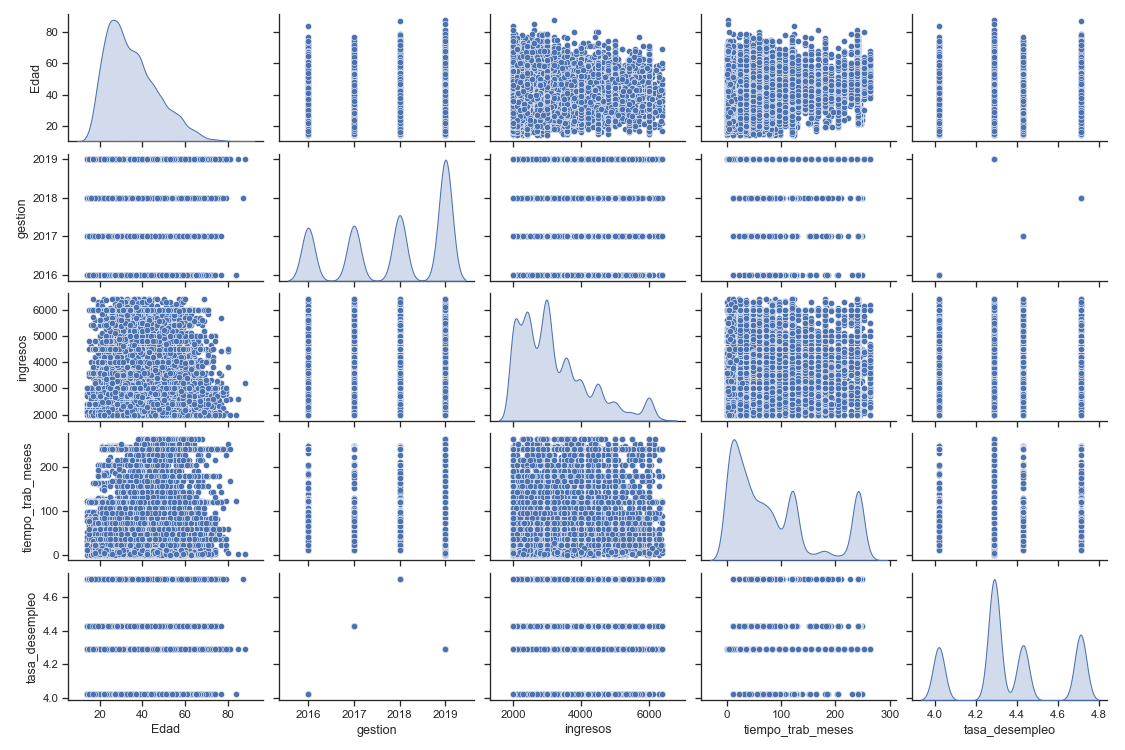

C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas relevantes del DataFrame
columns_to_plot = ['Edad', 'gestion', 'ingresos', 'tiempo_trab_meses', 'tasa_desempleo']
data_to_plot = df_1[columns_to_plot]

# Configuración de tamaño y diseño
sns.set(style="ticks")
sns.pairplot(data_to_plot, height=2, aspect=1.5, diag_kind='kde')

plt.show()


<IPython.core.display.Javascript object>


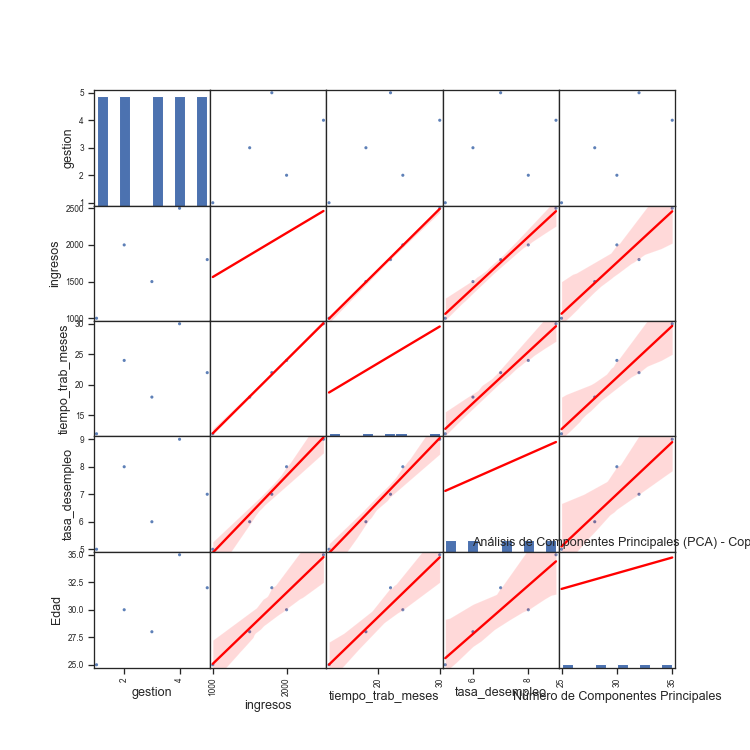

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {'gestion': [1, 2, 3, 4, 5],
        'ingresos': [1000, 2000, 1500, 2500, 1800],
        'tiempo_trab_meses': [12, 24, 18, 30, 22],
        'tasa_desempleo': [5, 8, 6, 9, 7],
        'Edad': [25, 30, 28, 35, 32]} 

# Crear una copia del DataFrame original
df_copia = pd.DataFrame(data).copy(deep=True)

# Crear un gráfico de dispersión con líneas de tendencia
scatter_matrix = pd.plotting.scatter_matrix(df_copia, alpha=0.9, figsize=(10, 10))

# Agregar líneas de tendencia utilizando Seaborn
for i, ax_i in enumerate(scatter_matrix):
    for j, ax_j in enumerate(ax_i):
        # Obtener el nombre de las columnas en los ejes x e y
        x_col = df_copia.columns[j]
        y_col = df_copia.columns[i]
        
        # Agregar línea de tendencia solo si las columnas en los ejes x e y son diferentes de 'gestion'
        if x_col != 'gestion' and y_col != 'gestion':
            sns.regplot(x=df_copia[x_col], y=df_copia[y_col], scatter=False, ax=ax_j, color='red')

plt.show()



In [74]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,30085.000000,30085.0,3.008500e+04,30085.000000,25759.000000,25759.000000,25759.000000,30085.000000
mean,2017.863487,3.0,1.906618e+06,34.982317,43.455346,86.786521,3209.221900,4.361016
std,1.139755,0.0,7.547402e+05,11.854471,13.191679,79.833430,1038.919669,0.225839
min,2016.000000,3.0,5.821560e+05,14.000000,3.000000,1.000000,1996.000000,4.020000
25%,2017.000000,3.0,1.329985e+06,26.000000,40.000000,22.000000,2400.000000,4.290000
50%,2018.000000,3.0,2.014559e+06,33.000000,44.000000,60.000000,3000.000000,4.290000
75%,2019.000000,3.0,2.636932e+06,42.000000,48.000000,121.000000,3700.000000,4.430000
max,2019.000000,3.0,2.739177e+06,88.000000,75.000000,264.000000,6400.000000,4.710000


## Analisis de Componentes principales (PCA)

In [75]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original
df_1_copy = df_1.copy()

# Seleccionar solo las variables numéricas en la copia
numeric_variables_copy = df_1_copy[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]

# Eliminar filas que contienen valores nulos en las columnas seleccionadas en la copia
numeric_variables_copy = numeric_variables_copy.dropna()

# Estandarizar las variables para que tengan media 0 y desviación estándar 1 (importante para PCA)
scaler = StandardScaler()
numeric_variables_standardized_copy = scaler.fit_transform(numeric_variables_copy)

# Crear un objeto PCA en la copia
pca_copy = PCA()

# Aplicar PCA a las variables estandarizadas en la copia
principal_components_copy = pca_copy.fit_transform(numeric_variables_standardized_copy)

# Obtener las proporciones de varianza explicada por cada componente principal en la copia
explained_variance_ratio_copy = pca_copy.explained_variance_ratio_

# Graficar la varianza explicada acumulativa en la copia
cumulative_explained_variance_copy = explained_variance_ratio_copy.cumsum()
plt.plot(range(1, len(cumulative_explained_variance_copy) + 1), cumulative_explained_variance_copy, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Análisis de Componentes Principales (PCA) - Copia')
plt.show()


<IPython.core.display.Javascript object>


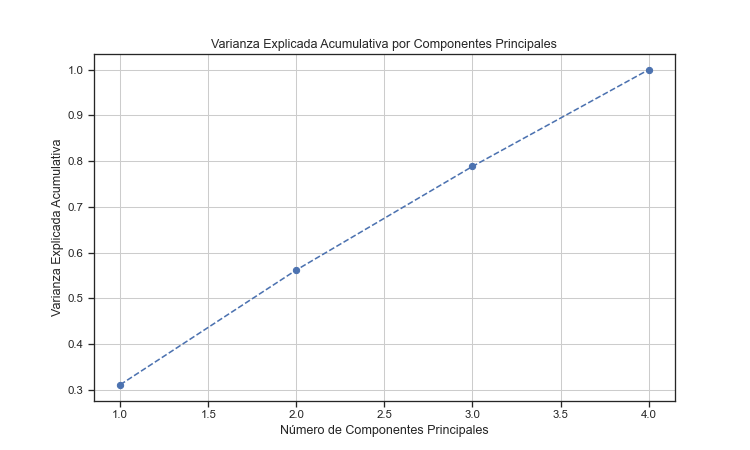

Proporción de Varianza Explicada por Componente Principal:
Componente Principal 1: 0.3107
Componente Principal 2: 0.2511
Componente Principal 3: 0.2266
Componente Principal 4: 0.2116


In [76]:
from sklearn.decomposition import PCA

# Crear un objeto PCA
pca = PCA()

# Aplicar PCA a las variables estandarizadas
pca_result = pca.fit_transform(numeric_variables_standardized_copy)

# Visualizar la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componentes Principales')
plt.grid(True)
plt.show()

# Imprimir las proporciones de varianza explicada por cada componente principal
print("Proporción de Varianza Explicada por Componente Principal:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Componente Principal {i}: {ratio:.4f}")


In [78]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Obtén los pesos (cargas) de las variables originales en cada componente principal
component_weights = pca_copy.components_

# Crea un DataFrame para mostrar los pesos
weights_df = pd.DataFrame(component_weights, columns=numeric_variables_copy.columns)

# Visualiza los pesos para cada componente principal
for i in range(len(weights_df)):
    print(f"\nComponente Principal {i+1}:\n{weights_df.iloc[i]}")




Componente Principal 1:
Edad                 0.618739
tiempo_trab_meses    0.548878
ingresos             0.559515
phrs                -0.053274
Name: 0, dtype: float64

Componente Principal 2:
Edad                -0.109564
tiempo_trab_meses    0.150874
ingresos            -0.119692
phrs                -0.975144
Name: 1, dtype: float64

Componente Principal 3:
Edad                 0.007225
tiempo_trab_meses   -0.713392
ingresos             0.673384
phrs                -0.193841
Name: 2, dtype: float64

Componente Principal 4:
Edad                 0.777885
tiempo_trab_meses   -0.408708
ingresos            -0.468157
phrs                -0.093173
Name: 3, dtype: float64


## Modelo de Regresion de minimos cuadrados ordinarios OLS

In [79]:
import pandas as pd
import statsmodels.api as sm

# Importa tus datos
df_regresion = df_1

df_regresion = df_regresion.dropna(subset=["ingresos", "tiempo_trab_meses", "phrs", "tasa_desempleo"])

# Selecciona las variables independientes y la variable dependiente
X = df_regresion[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]
y = df_regresion["tasa_desempleo"]

# Crea el modelo de regresión
X = sm.add_constant(X)  # Agrega una constante al modelo
model = sm.OLS(y, X).fit()

# Imprime el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.58
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           2.14e-09
Time:                        18:40:57   Log-Likelihood:                 2332.2
No. Observations:               25759   AIC:                            -4654.
Df Residuals:                   25754   BIC:                            -4614.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3917      0.00

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Obtén las predicciones del modelo
y_pred = model.predict(X)

# Calcular métricas de regresión
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.22


## Factor de inflacion de la varianza y Tolerancia

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprime los resultados del VIF
print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)


Factor de Inflación de la Varianza (VIF):
            Variable        VIF
0              const  28.547357
1               Edad   1.035026
2  tiempo_trab_meses   1.023843
3           ingresos   1.025321
4               phrs   1.000757


In [82]:
# Calcula la tolerancia para cada variable independiente
tolerance = 1 / vif_data["VIF"]

# Agrega la tolerancia al DataFrame
vif_data["Tolerance"] = tolerance

# Imprime los resultados de la tolerancia
print("Tolerancia:")
print(vif_data)


Tolerancia:
            Variable        VIF  Tolerance
0              const  28.547357   0.035030
1               Edad   1.035026   0.966159
2  tiempo_trab_meses   1.023843   0.976712
3           ingresos   1.025321   0.975304
4               phrs   1.000757   0.999244


In [83]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Matriz de correlación de Pearson

<IPython.core.display.Javascript object>


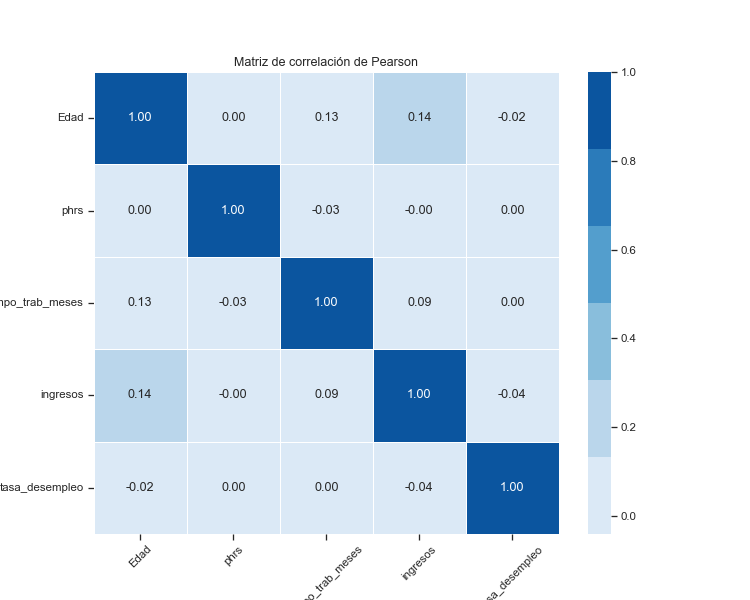

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona las variables numéricas para el análisis de correlación
variables_numericas = ['Edad','phrs', 'tiempo_trab_meses', 'ingresos', 'tasa_desempleo']

# Crea una subconjunto del DataFrame solo con las variables seleccionadas
df_1_numericas = df_1[variables_numericas]

# Calcula la matriz de correlación de Pearson
matriz_correlacion = df_1_numericas.corr()

# Configuración de colores
colores = sns.color_palette("Blues")

# Crea el gráfico de mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap=colores, fmt=".2f", linewidths=.5)

# Agrega un título al gráfico
plt.title("Matriz de correlación de Pearson")

# Ajusta las etiquetas de los ejes
plt.xticks(np.arange(0.5, len(variables_numericas) + 0.5), variables_numericas, rotation=45)
plt.yticks(np.arange(0.5, len(variables_numericas) + 0.5), variables_numericas, rotation=0)

# Muestra el gráfico
plt.show()



In [86]:
%matplotlib inline

# Descriptivos para Variables Categóricas:

In [87]:
df_1.describe(include='object')

,depto,peao,Genero,s1_05,Niv_Ed,Est_Civ,Nacionalidad,ocupacion,Trabaja,Cont_Trab,condact,Segundo_Trab,Aporta_Hog,pagos_extra
count,30085,30085,30085,30085,30085,30085,30085,30085,30085,30085,30085,30085,30085,30085
unique,9,2,2,9,6,4,2,10,2,2,3,2,2,2
top,La Paz,Si,Hombre,JEFE O JEFA DEL HOGAR,Superior,CASADO/A,Boliviano/a,"Trabajadores de la Construcción, Ind. Manufact...",Si,Si,Ocupado,No,Si,No
freq,6434,25823,20206,16738,12213,18815,30005,7874,25283,25270,25823,27458,25056,19139


In [88]:
df_1['peao'].value_counts()

peao
Si    25823
No     4262
Name: count, dtype: int64

In [89]:
import pandas as pd

# Supongamos que estas son las variables en tu DataFrame
variables_categoricas = ['depto', 'peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion',
                          'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

# Calcular la frecuencia para cada variable categórica
for variable in variables_categoricas:
    frecuencia_variable = df_1[variable].value_counts()
    print(f"Frecuencia para {variable}:")
    print(frecuencia_variable)
    print()

# Calcular el porcentaje para cada variable categórica
for variable in variables_categoricas:
    porcentaje_variable = df_1[variable].value_counts(normalize=True) * 100
    print(f"Porcentaje para {variable}:")
    print(porcentaje_variable)
    print()


Frecuencia para depto:
depto
La Paz        6434
Santa Cruz    6170
Cochabamba    5212
Potosi        2634
Chuquisaca    2354
Pando         2121
Beni          1832
Tarija        1755
Oruro         1573
Name: count, dtype: int64

Frecuencia para peao:
peao
Si    25823
No     4262
Name: count, dtype: int64

Frecuencia para Genero:
Genero
Hombre    20206
Mujer      9879
Name: count, dtype: int64

Frecuencia para s1_05:
s1_05
JEFE O JEFA DEL HOGAR      16738
HIJO/A O ENTENADO/A         6946
ESPOSA/O O CONVIVIENTE      5221
HERMANO/A O CUÑADO/A         408
YERNO O NUERA                351
NIETO/NIETA                  189
OTRO PARIENTE                151
PADRES/SUEGROS                47
OTRO QUE NO ES PARIENTE       34
Name: count, dtype: int64

Frecuencia para Niv_Ed:
Niv_Ed
Superior                 12213
Secundaria completa       6103
Secundaria incompleta     5562
Primaria incompleta       3861
Primaria completa         2147
Ninguno                    199
Name: count, dtype: int64

Frecuenc

<IPython.core.display.Javascript object>


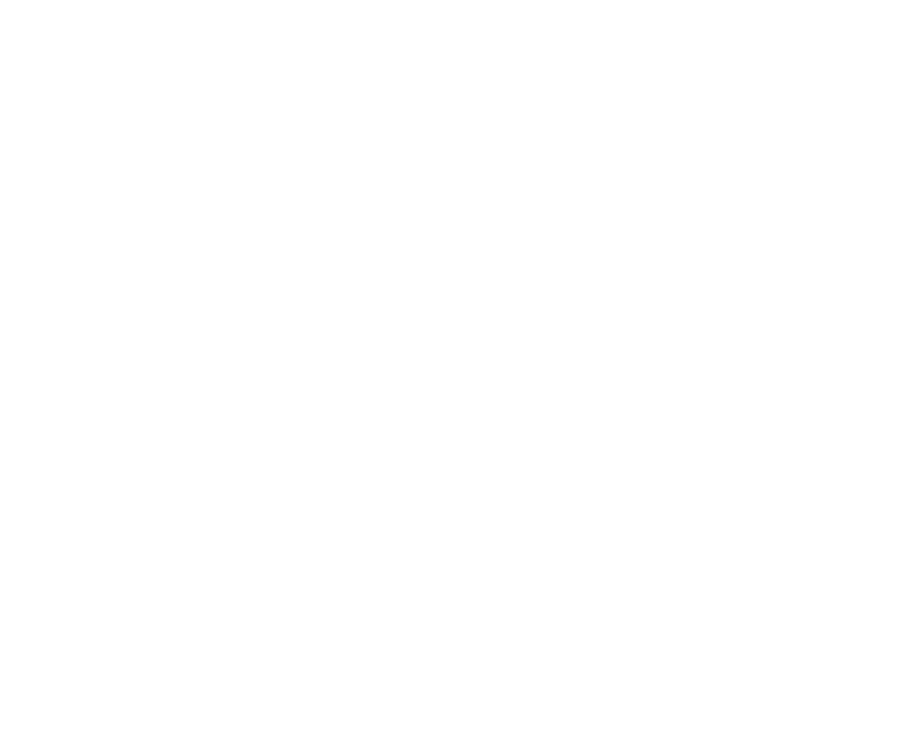

<IPython.core.display.Javascript object>


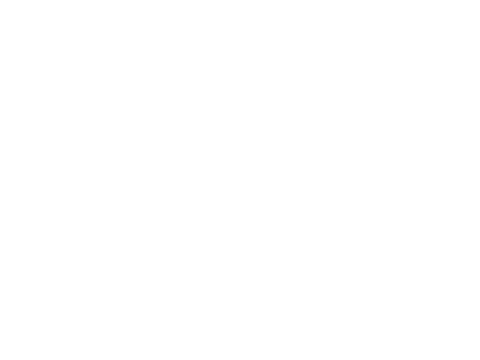

<IPython.core.display.Javascript object>


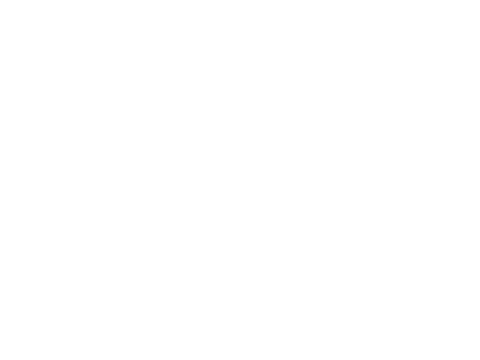

<IPython.core.display.Javascript object>


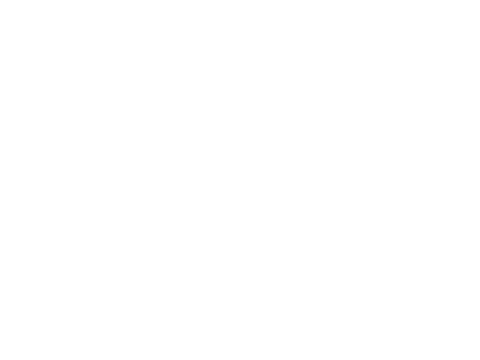

<IPython.core.display.Javascript object>


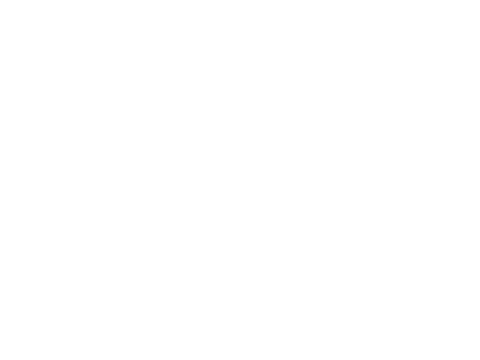

<IPython.core.display.Javascript object>


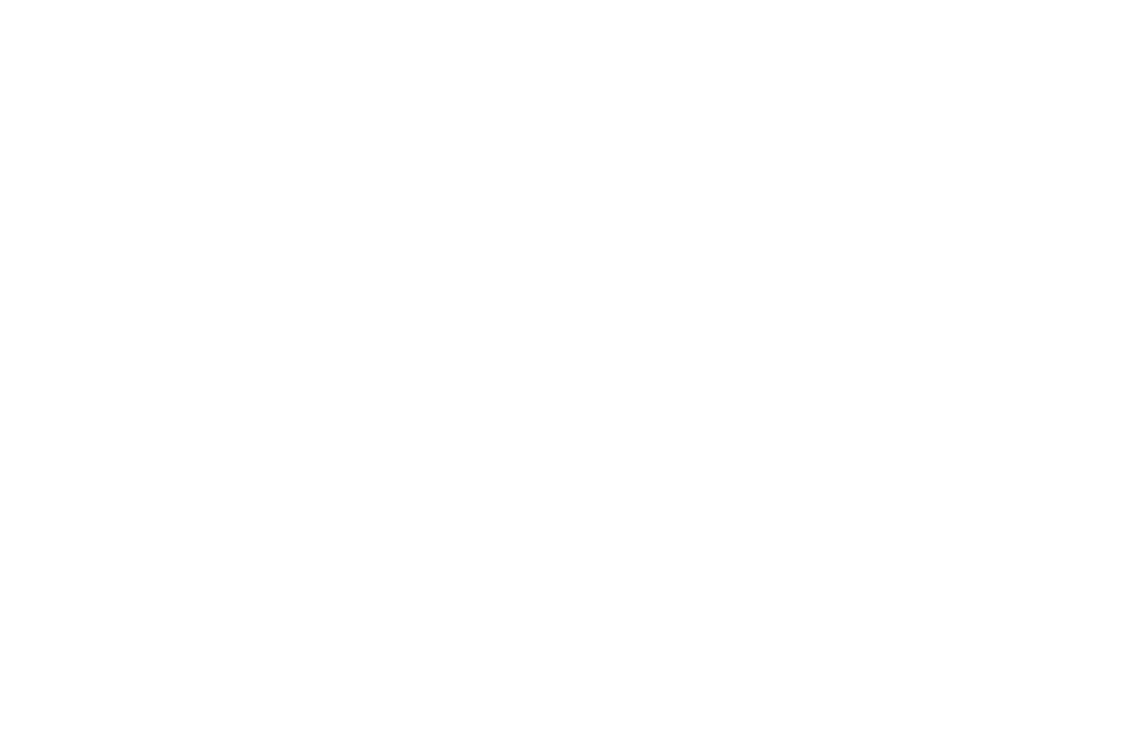

<IPython.core.display.Javascript object>


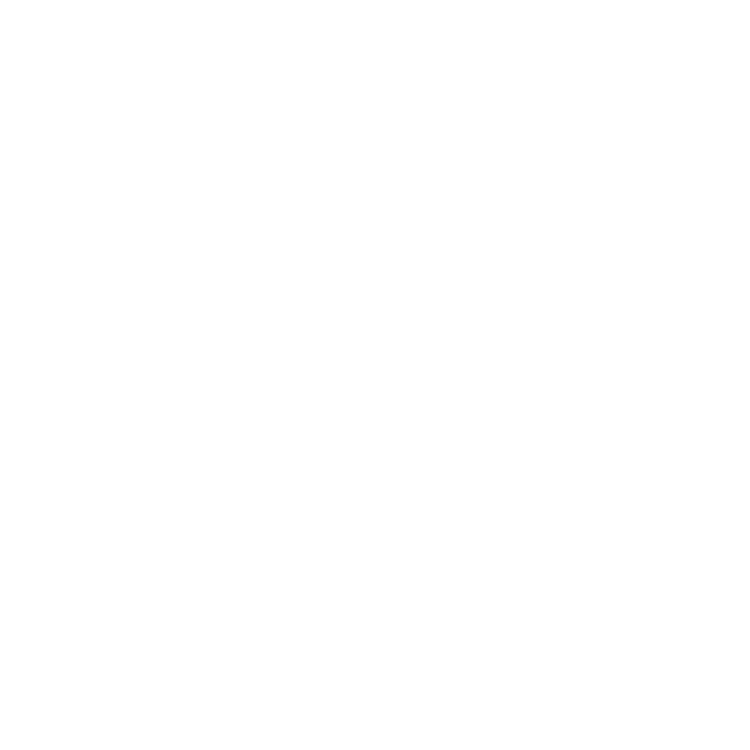

<IPython.core.display.Javascript object>


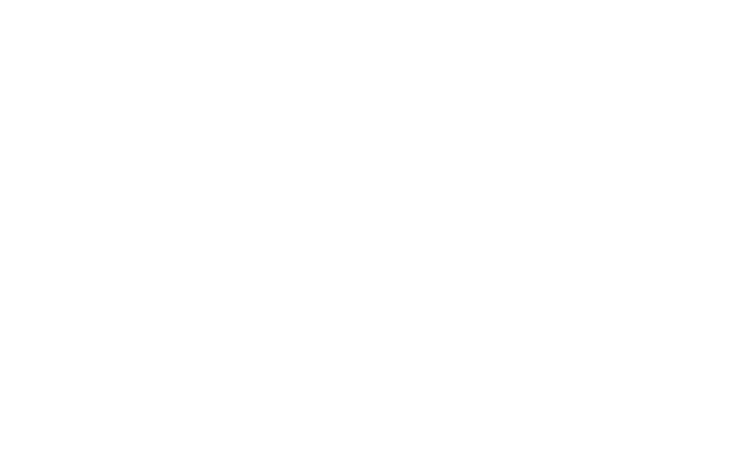

<IPython.core.display.Javascript object>


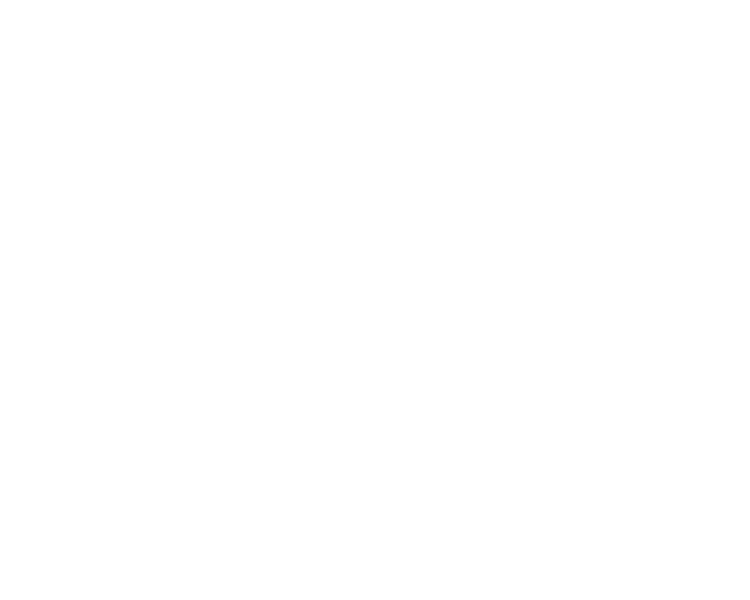

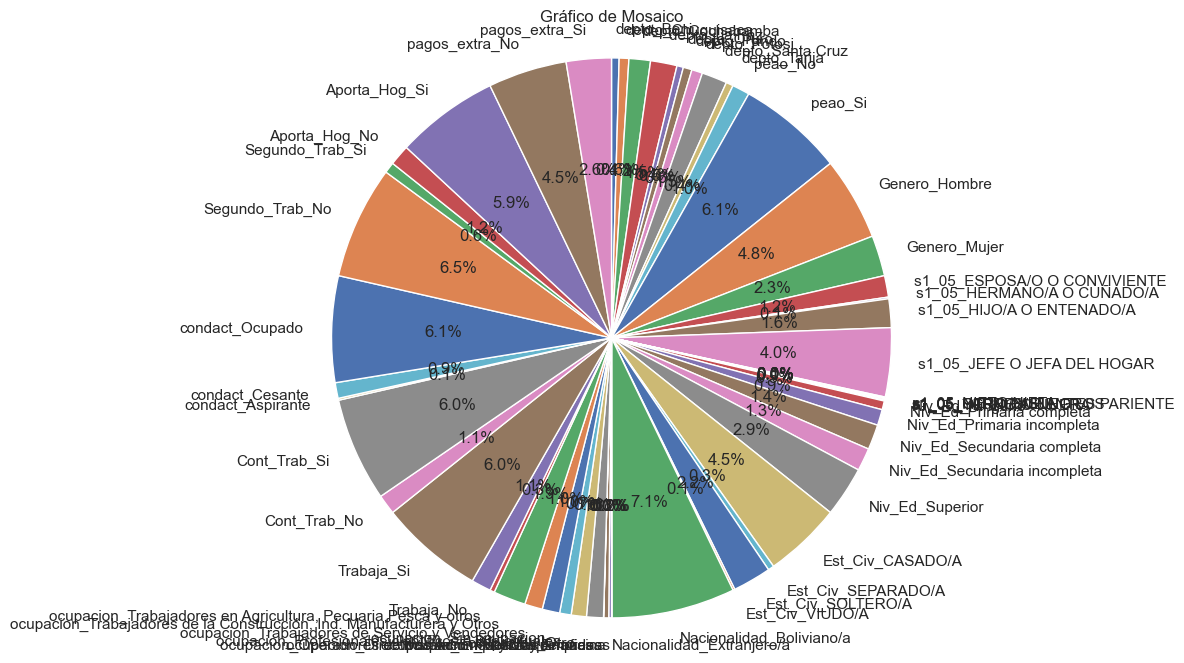

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_1 es tu DataFrame y variables_categoricas es la lista de columnas categóricas
df_subset = pd.get_dummies(df_1[variables_categoricas])

# Configurar el tamaño del gráfico si es necesario
plt.figure(figsize=(10, 8))

# Crear el gráfico de mosaico
plt.pie(df_subset.sum(), labels=df_subset.columns, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.title('Gráfico de Mosaico')
plt.show()


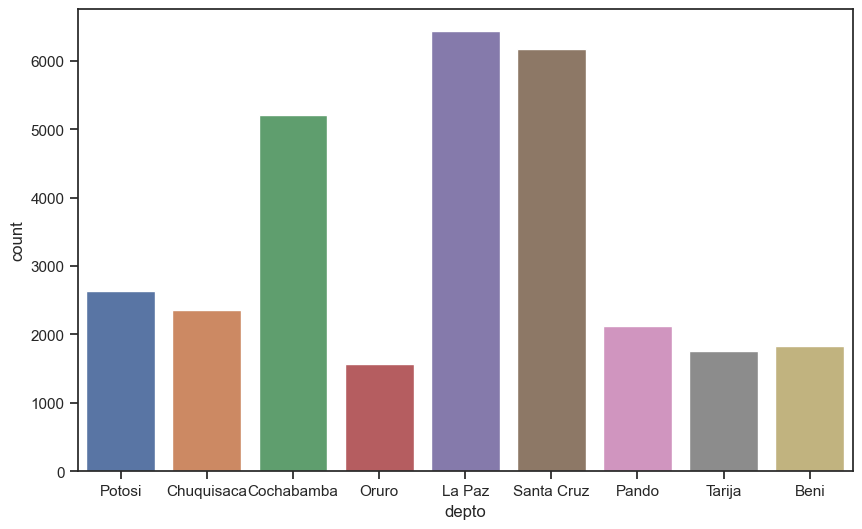

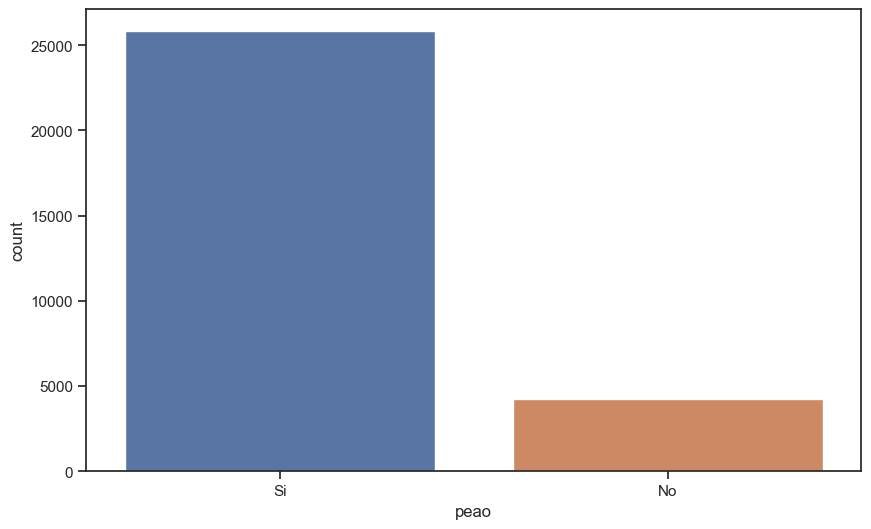

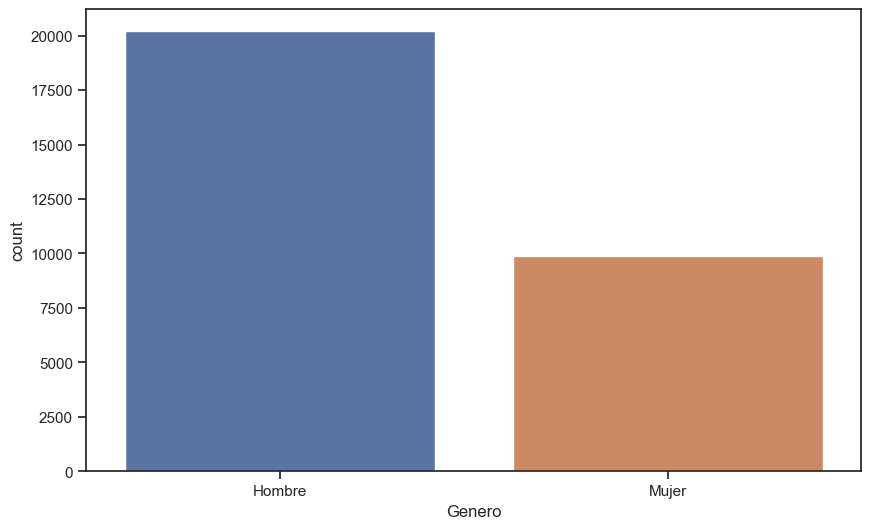

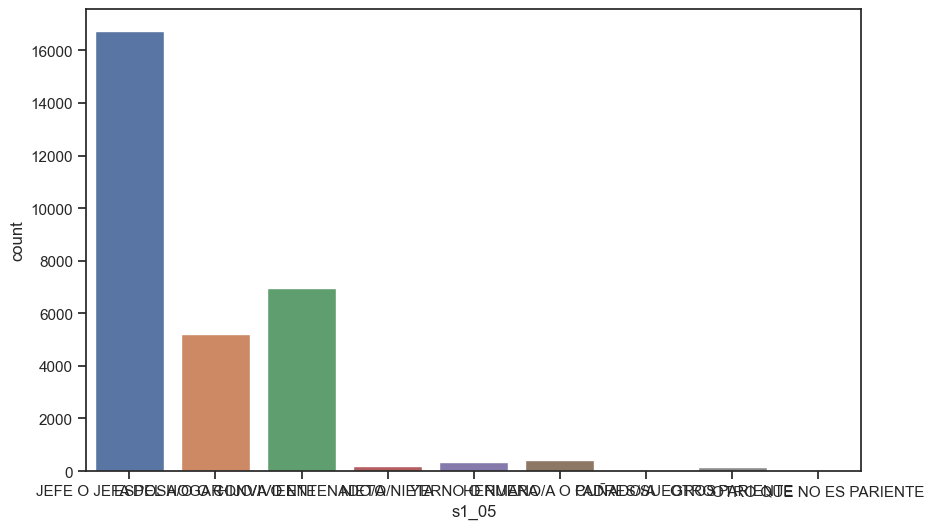

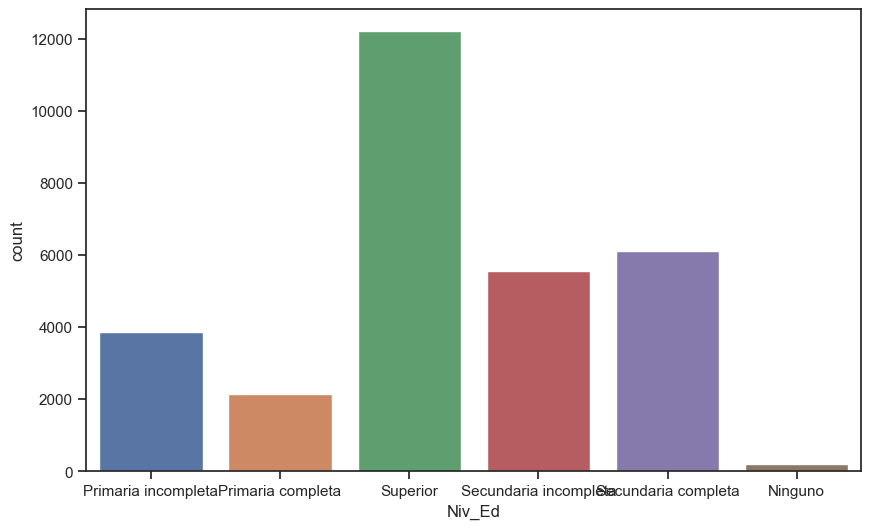

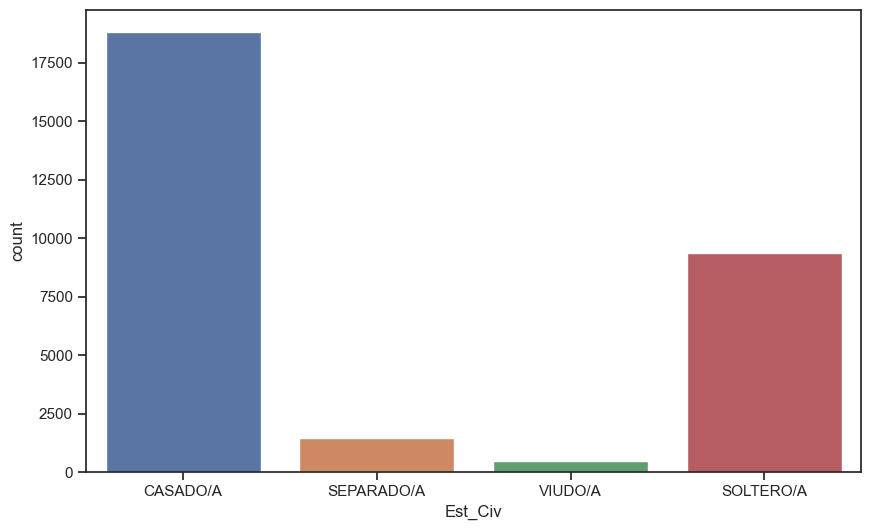

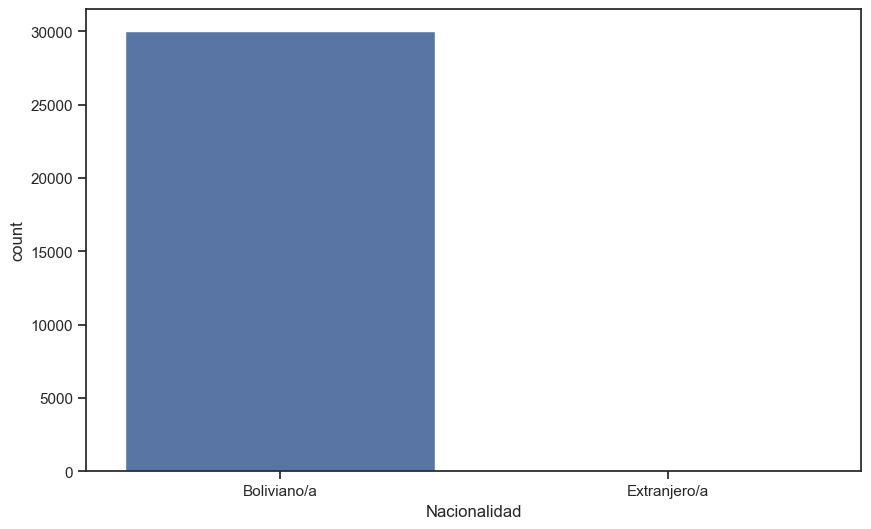

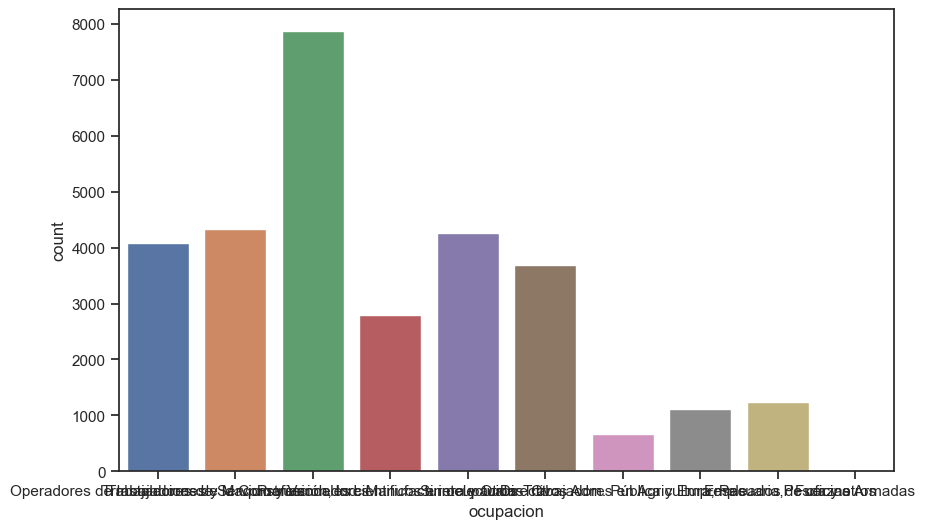

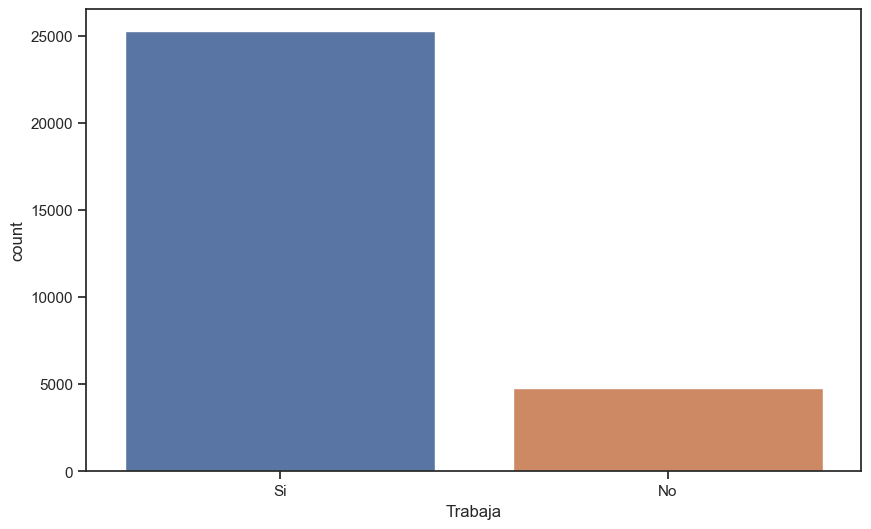

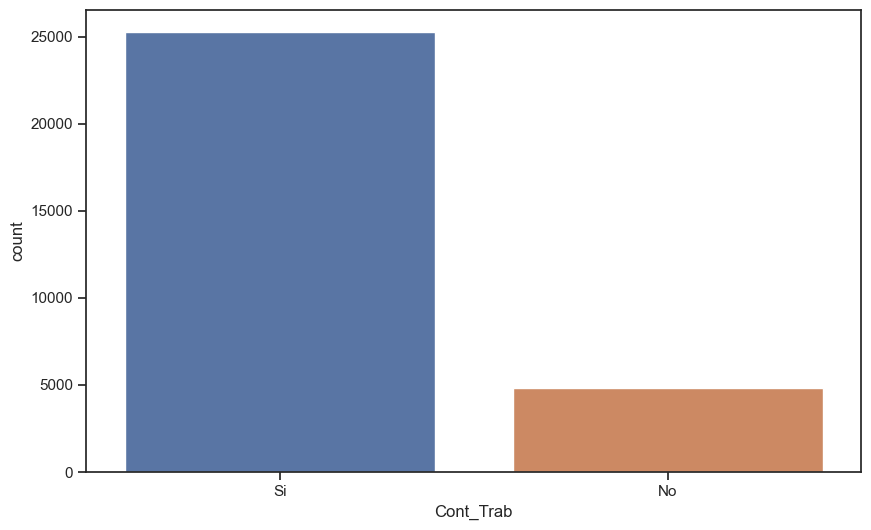

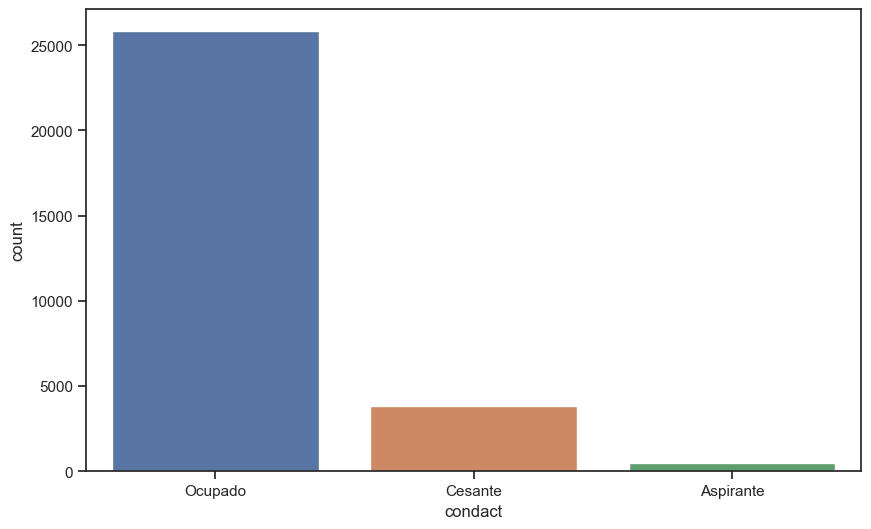

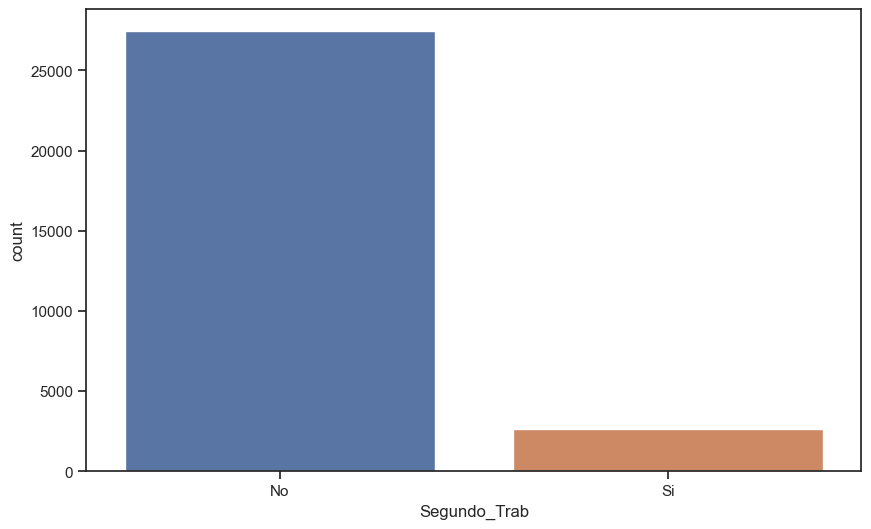

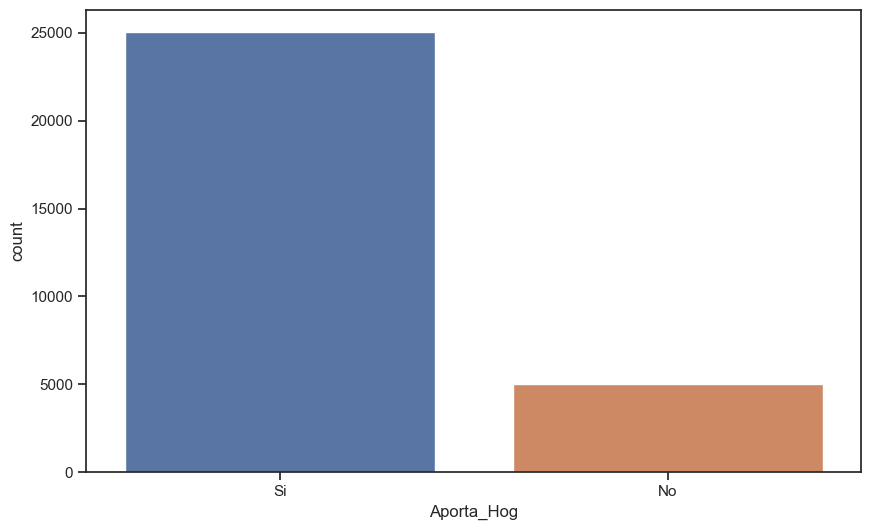

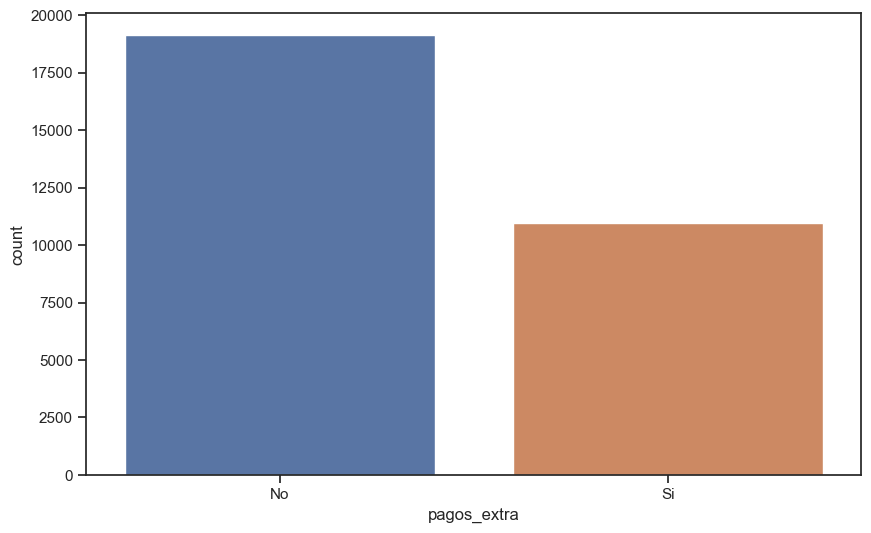

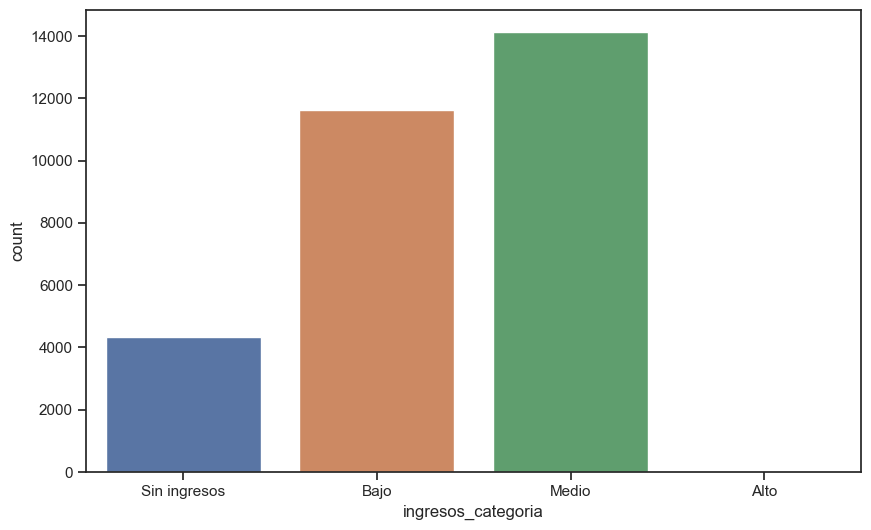

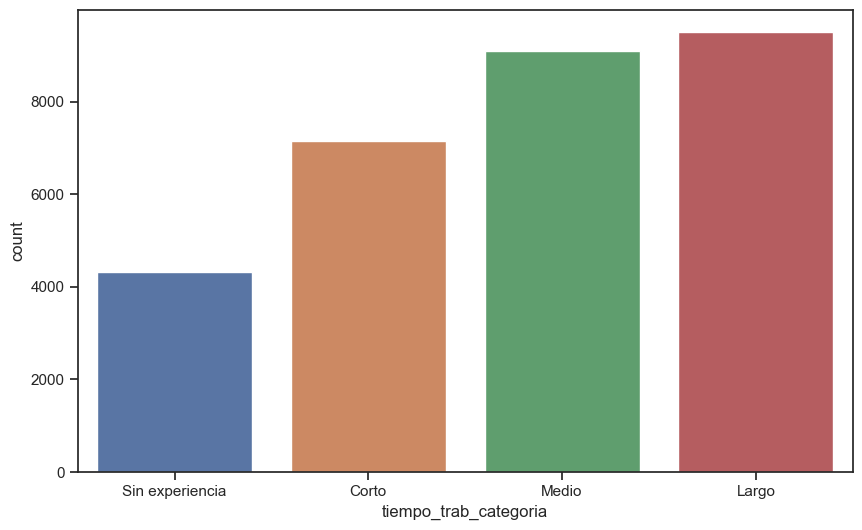

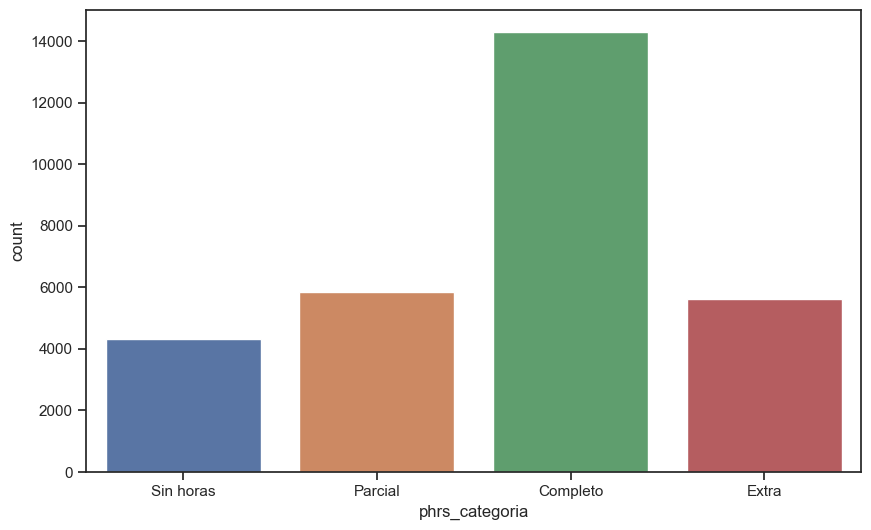

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_1.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_1)
    plt.show()



In [92]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Lista de tus variables categóricas
variables_categoricas = ['peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion', 'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

# Bucle para realizar el análisis para cada variable
for variable in variables_categoricas:
    # Asegúrate de que la variable sea de tipo 'category'
    df_1[variable] = pd.Categorical(df_1[variable])

    # Crear una tabla de contingencia
    contingency_table = pd.crosstab(df_1[variable], df_1['tasa_desempleo'])

    # Imprimir la tabla de contingencia
    print(f"\nTabla de Contingencia para {variable}:")
    print(contingency_table)

    # Prueba de Chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi2: {chi2}, p-value: {p}")

    # Coeficiente de Contingencia (Cramér's V)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    print(f"Coeficiente de Contingencia (Cramér's V) para {variable}: {cramer_v}")

    # Análisis de tendencias (Promedio por Categoría)
    trend_analysis = df_1.groupby(variable)['tasa_desempleo'].mean()
    print(f"\nAnálisis de Tendencias para {variable}:")
    print(trend_analysis)



Tabla de Contingencia para peao:
tasa_desempleo  4.02   4.29  4.43  4.71
peao                                   
No              1039    937  1117  1169
Si              4378  11413  4506  5526

Chi2: 761.5698631219824, p-value: 9.34478923753548e-165
Coeficiente de Contingencia (Cramér's V) para peao: 0.1587924955700373

Análisis de Tendencias para peao:
peao
No    4.376070
Si    4.358532
Name: tasa_desempleo, dtype: float64

Tabla de Contingencia para Genero:
tasa_desempleo  4.02  4.29  4.43  4.71
Genero                                
Hombre          3671  8121  3701  4713
Mujer           1746  4229  1922  1982

Chi2: 48.30009329084324, p-value: 1.8382717054962717e-10
Coeficiente de Contingencia (Cramér's V) para Genero: 0.038804427495789225

Análisis de Tendencias para Genero:
Genero
Hombre    4.364554
Mujer     4.353782
Name: tasa_desempleo, dtype: float64

Tabla de Contingencia para s1_05:
tasa_desempleo           4.02  4.29  4.43  4.71
s1_05                                       

In [93]:
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr
import numpy as np

# Crear tabla de contingencia para 'ingresos_categoria'
contingency_table_ingresos = pd.crosstab(df_1['ingresos_categoria'], df_1['tasa_desempleo'])
print("Tabla de Contingencia (Ingresos):")
print(contingency_table_ingresos)

# Prueba de Chi-cuadrado para 'ingresos_categoria'
chi2_ingresos, p_ingresos, _, _ = chi2_contingency(contingency_table_ingresos)
print(f"\nChi2 (Ingresos): {chi2_ingresos}, p-value: {p_ingresos}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_ingresos.sum().sum()
phi2_ingresos = chi2_ingresos / n
r, k = contingency_table_ingresos.shape
cramers_v_ingresos = np.sqrt(phi2_ingresos / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Ingresos): {cramers_v_ingresos}")

# Análisis de tendencias para 'ingresos_categoria'
trend_analysis_ingresos = df_1.groupby('ingresos_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Ingresos):")
print(trend_analysis_ingresos)

# Coeficiente de correlación de Spearman para 'ingresos_categoria'
spearman_corr_ingresos, _ = spearmanr(df_1['ingresos_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Ingresos): {spearman_corr_ingresos}")

# Repetir para 'tiempo_trab_categoria'

# Crear tabla de contingencia para 'tiempo_trab_categoria'
contingency_table_tiempo_trab = pd.crosstab(df_1['tiempo_trab_categoria'], df_1['tasa_desempleo'])
print("\nTabla de Contingencia (Tiempo de Trabajo):")
print(contingency_table_tiempo_trab)

# Prueba de Chi-cuadrado para 'tiempo_trab_categoria'
chi2_tiempo_trab, p_tiempo_trab, _, _ = chi2_contingency(contingency_table_tiempo_trab)
print(f"\nChi2 (Tiempo de Trabajo): {chi2_tiempo_trab}, p-value: {p_tiempo_trab}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_tiempo_trab.sum().sum()
phi2_tiempo_trab = chi2_tiempo_trab / n
r, k = contingency_table_tiempo_trab.shape
cramers_v_tiempo_trab = np.sqrt(phi2_tiempo_trab / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Tiempo de Trabajo): {cramers_v_tiempo_trab}")

# Análisis de tendencias para 'tiempo_trab_categoria'
trend_analysis_tiempo_trab = df_1.groupby('tiempo_trab_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Tiempo de Trabajo):")
print(trend_analysis_tiempo_trab)

# Coeficiente de correlación de Spearman para 'tiempo_trab_categoria'
spearman_corr_tiempo_trab, _ = spearmanr(df_1['tiempo_trab_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Tiempo de Trabajo): {spearman_corr_tiempo_trab}")

# Repetir para 'phrs_categoria'

# Crear tabla de contingencia para 'phrs_categoria'
contingency_table_phrs = pd.crosstab(df_1['phrs_categoria'], df_1['tasa_desempleo'])
print("\nTabla de Contingencia (Horas de Trabajo):")
print(contingency_table_phrs)

# Prueba de Chi-cuadrado para 'phrs_categoria'
chi2_phrs, p_phrs, _, _ = chi2_contingency(contingency_table_phrs)
print(f"\nChi2 (Horas de Trabajo): {chi2_phrs}, p-value: {p_phrs}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_phrs.sum().sum()
phi2_phrs = chi2_phrs / n
r, k = contingency_table_phrs.shape
cramers_v_phrs = np.sqrt(phi2_phrs / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Horas de Trabajo): {cramers_v_phrs}")

# Análisis de tendencias para 'phrs_categoria'
trend_analysis_phrs = df_1.groupby('phrs_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Horas de Trabajo):")
print(trend_analysis_phrs)

# Coeficiente de correlación de Spearman para 'phrs_categoria'
spearman_corr_phrs, _ = spearmanr(df_1['phrs_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Horas de Trabajo): {spearman_corr_phrs}")



Tabla de Contingencia (Ingresos):
tasa_desempleo      4.02  4.29  4.43  4.71
ingresos_categoria                        
Sin ingresos        1039   937  1181  1169
Bajo                1989  4830  2138  2666
Medio               2389  6583  2304  2860

Chi2 (Ingresos): 891.4024351731504, p-value: 2.712858099456759e-189

Coeficiente de Contingencia (Cramér's V) (Ingresos): 0.12171578442576965

Análisis de Tendencias (Ingresos):
ingresos_categoria
Sin ingresos    4.376868
Bajo            4.365885
Medio           4.352163
Alto                 NaN
Name: tasa_desempleo, dtype: float64

Coeficiente de Correlación de Spearman (Ingresos): -0.055758128996196935

Tabla de Contingencia (Tiempo de Trabajo):
tasa_desempleo         4.02  4.29  4.43  4.71
tiempo_trab_categoria                        
Sin experiencia        1039   937  1181  1169
Corto                   700  4443   694  1308
Medio                  1494  3889  1507  2212
Largo                  2184  3081  2241  2006

Chi2 (Tiempo de Traba

In [94]:
from scipy.stats import chi2_contingency

# Crear una copia del DataFrame original
df_copy = df_1.copy()

categorical_variables = ['peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion', 
                          'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            # Crear tabla de contingencia
            contingency_table = pd.crosstab(df_copy[var1], df_copy[var2])

            # Realizar la prueba de chi-cuadrado
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Imprimir resultados
            print(f"Prueba de chi-cuadrado para '{var1}' vs '{var2}': Estadística = {chi2}, Valor p = {p}")

            # Puedes agregar aquí la lógica para usar el valor p y tomar decisiones

Prueba de chi-cuadrado para 'peao' vs 'Genero': Estadística = 581.5718329765532, Valor p = 1.706773364059655e-128
Prueba de chi-cuadrado para 'peao' vs 's1_05': Estadística = 1428.9932341310625, Valor p = 3.0460422369366504e-303
Prueba de chi-cuadrado para 'peao' vs 'Niv_Ed': Estadística = 176.90003246339998, Valor p = 2.4569750223085838e-36
Prueba de chi-cuadrado para 'peao' vs 'Est_Civ': Estadística = 1055.216572808308, Valor p = 1.8908385893043466e-228
Prueba de chi-cuadrado para 'peao' vs 'Nacionalidad': Estadística = 1.0336687339272854, Valor p = 0.3092985425096864
Prueba de chi-cuadrado para 'peao' vs 'ocupacion': Estadística = 30011.101599918173, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Trabaja': Estadística = 26136.17043351366, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Cont_Trab': Estadística = 26052.19934528249, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'condact': Estadística = 30085.0, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Segun

Prueba de chi-cuadrado para 'Cont_Trab' vs 'Genero': Estadística = 427.3550376635028, Valor p = 6.117415110353712e-95
Prueba de chi-cuadrado para 'Cont_Trab' vs 's1_05': Estadística = 1288.2173055105397, Valor p = 8.27783655357292e-273
Prueba de chi-cuadrado para 'Cont_Trab' vs 'Niv_Ed': Estadística = 102.62420754862788, Valor p = 1.478300406853694e-20
Prueba de chi-cuadrado para 'Cont_Trab' vs 'Est_Civ': Estadística = 999.4981786388507, Valor p = 2.3120280552586527e-216
Prueba de chi-cuadrado para 'Cont_Trab' vs 'Nacionalidad': Estadística = 2.056233098535303, Valor p = 0.15158449226779577
Prueba de chi-cuadrado para 'Cont_Trab' vs 'ocupacion': Estadística = 26034.71408457641, Valor p = 0.0
Prueba de chi-cuadrado para 'Cont_Trab' vs 'Trabaja': Estadística = 23769.390838495063, Valor p = 0.0
Prueba de chi-cuadrado para 'Cont_Trab' vs 'condact': Estadística = 26059.47826140807, Valor p = 0.0
Prueba de chi-cuadrado para 'Cont_Trab' vs 'Segundo_Trab': Estadística = 371.301534850792, Valor

In [95]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# ANOVA para una variable categórica (ejemplo: nivel educativo)
anova_model = ols('tasa_desempleo ~ C(Niv_Ed)', data=df_1).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Regresión univariable para cada categoría de la variable categórica
categories = df['Niv_Ed'].unique()

for category in categories:
    category_df = df[df['Niv_Ed'] == category]
    regression_model = ols(f'tasa_desempleo ~ 1', data=category_df).fit()
    
    print(f"\nRegression Results for {category}:")
    print(regression_model.summary())


ANOVA Results:
                sum_sq       df       F        PR(>F)
C(Niv_Ed)     2.014709      5.0  7.9094  1.863435e-07
Residual   1532.364608  30079.0     NaN           NaN

Regression Results for Primaria incompleta:
                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                nan
Time:                        18:41:04   Log-Likelihood:                 432.19
No. Observations:                5050   AIC:                            -862.4
Df Residuals:                    5049   BIC:                            -855.8
Df Model:                           0                                         
Covariance Type:            nonrobust                              

In [96]:
# ANOVA
anova_model = ols('tasa_desempleo ~ C(depto)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Regresión univariable
categories = df['depto'].unique()

for category in categories:
    category_df = df[df['depto'] == category]
    regression_model = ols(f'tasa_desempleo ~ 1', data=category_df).fit()
    
    print(f"\nRegression Results for {category}:")
    print(regression_model.summary())


ANOVA Results:
               sum_sq       df         F        PR(>F)
C(depto)     3.041369      8.0  7.855268  1.313422e-10
Residual  1931.958658  39919.0       NaN           NaN

Regression Results for Potosi:
                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                nan
Time:                        18:41:04   Log-Likelihood:                 404.67
No. Observations:                3439   AIC:                            -807.3
Df Residuals:                    3438   BIC:                            -801.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                        

In [97]:
from scipy.stats import levene
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'Est_Civ'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors = []

# Filtrar los datos para cada categoría de 'Est_Civ' y almacenar los vectores
categorias_est_civ = df_1['Est_Civ'].unique()

for categoria in categorias_est_civ:
    subset_data = df_1[df_1['Est_Civ'] == categoria]['tasa_desempleo']
    data_vectors.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat, p_value = levene(*data_vectors)

# Mostrar los resultados
print(f"Prueba de Levene para todos los datos: Estadística = {stat}, Valor p = {p_value}")



Prueba de Levene para todos los datos: Estadística = 46.33714972823789, Valor p = 7.230150960135495e-30


In [98]:
from scipy.stats import f_oneway

# Suponiendo que 'tasa_desempleo' es tu variable dependiente y 'Est_Civ' es la variable categórica
grupo_categorias = [df_1['tasa_desempleo'][df_1['Est_Civ'] == categoria] for categoria in categorias_est_civ]

# Aplicar ANOVA
stat, p_value = f_oneway(*grupo_categorias)

# Mostrar resultados
print(f"ANOVA: Estadística F = {stat}, Valor p = {p_value}")


ANOVA: Estadística F = 0.9962089988421933, Valor p = 0.393397283741979


In [99]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar prueba de Tukey
tukey_results = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['Est_Civ'])

# Mostrar resultados
print(tukey_results)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
  CASADO/A SEPARADO/A  -0.0001    1.0  -0.016 0.0157  False
  CASADO/A  SOLTERO/A   0.0049 0.3216 -0.0025 0.0122  False
  CASADO/A    VIUDO/A   0.0011 0.9996 -0.0259 0.0281  False
SEPARADO/A  SOLTERO/A    0.005 0.8609 -0.0114 0.0214  False
SEPARADO/A    VIUDO/A   0.0012 0.9996 -0.0295  0.032  False
 SOLTERO/A    VIUDO/A  -0.0038 0.9848 -0.0311 0.0236  False
-----------------------------------------------------------


In [100]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'depto'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_depto = []

# Filtrar los datos para cada categoría de 'depto' y almacenar los vectores
categorias_depto = df_1['depto'].unique()

for categoria in categorias_depto:
    subset_data = df_1[df_1['depto'] == categoria]['tasa_desempleo']
    data_vectors_depto.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_depto, p_value_depto = levene(*data_vectors_depto)

# Mostrar los resultados
print(f"Prueba de Levene para 'depto': Estadística = {stat_depto}, Valor p = {p_value_depto}")

# Aplicar ANOVA
grupo_categorias_depto = [df_1['tasa_desempleo'][df_1['depto'] == categoria] for categoria in categorias_depto]
stat_depto_anova, p_value_depto_anova = f_oneway(*grupo_categorias_depto)

# Mostrar resultados ANOVA
print(f"ANOVA para 'depto': Estadística F = {stat_depto_anova}, Valor p = {p_value_depto_anova}")

# Realizar prueba de Tukey
tukey_results_depto = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['depto'])

# Mostrar resultados Tukey
print(tukey_results_depto)



Prueba de Levene para 'depto': Estadística = 8.477233689100753, Valor p = 1.3775194366610835e-11
ANOVA para 'depto': Estadística F = 6.104951035328847, Valor p = 6.92947525915972e-08
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Beni Chuquisaca  -0.0291 0.0012 -0.0509 -0.0073   True
      Beni Cochabamba  -0.0041 0.9992 -0.0231  0.0149  False
      Beni     La Paz  -0.0057 0.9893 -0.0243  0.0128  False
      Beni      Oruro   0.0172 0.3976 -0.0069  0.0412  False
      Beni      Pando   0.0057  0.997 -0.0166  0.0281  False
      Beni     Potosi  -0.0082 0.9593 -0.0295  0.0131  False
      Beni Santa Cruz  -0.0067 0.9722 -0.0253  0.0119  False
      Beni     Tarija  -0.0031    1.0 -0.0264  0.0203  False
Chuquisaca Cochabamba    0.025 0.0003  0.0076  0.0424   True
Chuquisaca     La Paz   0.0234 0.0006  0.0065  0.0402   True
Chuquisaca      Oruro   

In [101]:
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'ocupacion'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_ocupacion = []

# Filtrar los datos para cada categoría de 'ocupacion' y almacenar los vectores
categorias_ocupacion = df_1['ocupacion'].unique()

for categoria in categorias_ocupacion:
    subset_data = df_1[df_1['ocupacion'] == categoria]['tasa_desempleo']
    data_vectors_ocupacion.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_ocupacion, p_value_ocupacion = levene(*data_vectors_ocupacion)

# Mostrar los resultados
print(f"Prueba de Levene para 'ocupacion': Estadística = {stat_ocupacion}, Valor p = {p_value_ocupacion}")

# Aplicar ANOVA
grupo_categorias_ocupacion = [df_1['tasa_desempleo'][df_1['ocupacion'] == categoria] for categoria in categorias_ocupacion]
stat_ocupacion_anova, p_value_ocupacion_anova = f_oneway(*grupo_categorias_ocupacion)

# Mostrar resultados ANOVA
print(f"ANOVA para 'ocupacion': Estadística F = {stat_ocupacion_anova}, Valor p = {p_value_ocupacion_anova}")

# Realizar prueba de Tukey
tukey_results_ocupacion = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['ocupacion'])

# Mostrar resultados Tukey
print(tukey_results_ocupacion)


Prueba de Levene para 'ocupacion': Estadística = 73.27948277730641, Valor p = 1.1366816205269132e-134
ANOVA para 'ocupacion': Estadística F = 18.328652995292092, Valor p = 8.507297452452802e-31


C:\Users\win10\anaconda3\jupyter\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                                                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                      
                           group1                                                      group2                           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------------------------------------------------------
                         Directivos Adm. Pública y Empresas                                        Empleados de oficina   0.0243 0.4228 -0.0099  0.0586  False
                         Directivos Adm. Pública y Empresas                                             Fuerzas Armadas  -0.0654 0.8905 -0.2029  0.0721  False
                         Directivos Adm. Pública y Empresas                   Operadores de Instalaciones y Maquinarias   0.0184 0.6306 -0.0114  0.0481  False
                         Directivos Adm. Públi

In [102]:
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'condact'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_condact = []

# Filtrar los datos para cada categoría de 'condact' y almacenar los vectores
categorias_condact = df_1['condact'].unique()

for categoria in categorias_condact:
    subset_data = df_1[df_1['condact'] == categoria]['tasa_desempleo']
    data_vectors_condact.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_condact, p_value_condact = levene(*data_vectors_condact)

# Mostrar los resultados
print(f"Prueba de Levene para 'condact': Estadística = {stat_condact}, Valor p = {p_value_condact}")

# Aplicar ANOVA
grupo_categorias_condact = [df_1['tasa_desempleo'][df_1['condact'] == categoria] for categoria in categorias_condact]
stat_condact_anova, p_value_condact_anova = f_oneway(*grupo_categorias_condact)

# Mostrar resultados ANOVA
print(f"ANOVA para 'condact': Estadística F = {stat_condact_anova}, Valor p = {p_value_condact_anova}")

# Realizar prueba de Tukey
tukey_results_condact = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['condact'])

# Mostrar resultados Tukey
print(tukey_results_condact)


Prueba de Levene para 'condact': Estadística = 153.1373486792048, Valor p = 6.754250508876894e-67
ANOVA para 'condact': Estadística F = 39.223626765521544, Valor p = 9.717802115220578e-18
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
Aspirante Cesante   0.0836   0.0  0.0575  0.1097   True
Aspirante Ocupado    0.057   0.0  0.0321  0.0819   True
  Cesante Ocupado  -0.0266   0.0 -0.0357 -0.0174   True
-------------------------------------------------------


In [103]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_s1_05 = []

# Filtrar los datos para cada categoría de 's1_05' y almacenar los vectores
categorias_s1_05 = df_1['s1_05'].unique()

for categoria in categorias_s1_05:
    subset_data = df_1[df_1['s1_05'] == categoria]['tasa_desempleo']
    data_vectors_s1_05.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_s1_05, p_value_s1_05 = levene(*data_vectors_s1_05)

# Mostrar los resultados
print(f"Prueba de Levene para 's1_05': Estadística = {stat_s1_05}, Valor p = {p_value_s1_05}")

# Aplicar ANOVA
grupo_categorias_s1_05 = [df_1['tasa_desempleo'][df_1['s1_05'] == categoria] for categoria in categorias_s1_05]
stat_s1_05_anova, p_value_s1_05_anova = f_oneway(*grupo_categorias_s1_05)

# Mostrar resultados ANOVA
print(f"ANOVA para 's1_05': Estadística F = {stat_s1_05_anova}, Valor p = {p_value_s1_05_anova}")

# Realizar prueba de Tukey
tukey_results_s1_05 = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['s1_05'])

# Mostrar resultados Tukey
print(tukey_results_s1_05)



Prueba de Levene para 's1_05': Estadística = 49.73187062231167, Valor p = 1.909281337917088e-80
ANOVA para 's1_05': Estadística F = 1.3109555054800979, Valor p = 0.23250226404624597
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
         group1                  group2         meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------
 ESPOSA/O O CONVIVIENTE    HERMANO/A O CUÑADO/A   0.0121 0.9813 -0.0239 0.0482  False
 ESPOSA/O O CONVIVIENTE     HIJO/A O ENTENADO/A   0.0066 0.8021 -0.0062 0.0195  False
 ESPOSA/O O CONVIVIENTE   JEFE O JEFA DEL HOGAR   0.0034 0.9894 -0.0077 0.0145  False
 ESPOSA/O O CONVIVIENTE             NIETO/NIETA   0.0235 0.8966 -0.0284 0.0754  False
 ESPOSA/O O CONVIVIENTE           OTRO PARIENTE   0.0282  0.849 -0.0296 0.0861  False
 ESPOSA/O O CONVIVIENTE OTRO QUE NO ES PARIENTE   0.0668 0.7344 -0.0537 0.1874  False
 ESPOSA/O O CONVIVIENTE          PADRES/SUEG

In [104]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_genero = []

# Filtrar los datos para cada categoría de 'Genero' y almacenar los vectores
categorias_genero = df_1['Genero'].unique()

for categoria in categorias_genero:
    subset_data = df_1[df_1['Genero'] == categoria]['tasa_desempleo']
    data_vectors_genero.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_genero, p_value_genero = levene(*data_vectors_genero)

# Mostrar los resultados
print(f"Prueba de Levene para 'Genero': Estadística = {stat_genero}, Valor p = {p_value_genero}")

# Aplicar ANOVA
grupo_categorias_genero = [df_1['tasa_desempleo'][df_1['Genero'] == categoria] for categoria in categorias_genero]
stat_genero_anova, p_value_genero_anova = f_oneway(*grupo_categorias_genero)

# Mostrar resultados ANOVA
print(f"ANOVA para 'Genero': Estadística F = {stat_genero_anova}, Valor p = {p_value_genero_anova}")

# Realizar prueba de Tukey
tukey_results_genero = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['Genero'])

# Mostrar resultados Tukey
print(tukey_results_genero)



Prueba de Levene para 'Genero': Estadística = 43.264867716991105, Valor p = 4.859246796476154e-11
ANOVA para 'Genero': Estadística F = 15.101822765391654, Valor p = 0.00010208313280586441
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Hombre  Mujer  -0.0108 0.0001 -0.0162 -0.0053   True
----------------------------------------------------


In [105]:
# Muestra los tipos de datos de cada columna
print(df_1.dtypes)


gestion                     int64
trimestre                   int64
id_persona                  int64
depto                      object
peao                     category
Genero                   category
Edad                        int64
s1_05                    category
Niv_Ed                   category
Est_Civ                  category
Nacionalidad             category
ocupacion                category
Trabaja                  category
Cont_Trab                category
condact                  category
phrs                      float64
Segundo_Trab             category
Aporta_Hog               category
tiempo_trab_meses         float64
ingresos                  float64
pagos_extra              category
tasa_desempleo            float64
ingresos_categoria       category
tiempo_trab_categoria    category
phrs_categoria           category
dtype: object


In [106]:
df_cleaned=df_1.copy()

# Columnas numéricas con valores nulos
columnas_numericas = ['phrs', 'tiempo_trab_meses', 'ingresos']

# Convierte las columnas a tipo numérico
df_cleaned[columnas_numericas] = df_cleaned[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Muestra información sobre los valores nulos y los tipos de datos después de la conversión
print(df_cleaned.info())

# Llena los valores nulos con una estrategia específica (por ejemplo, usando la media)
df_cleaned[columnas_numericas].fillna(df[columnas_numericas].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 30085 entries, 1 to 114308
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                30085 non-null  int64   
 1   trimestre              30085 non-null  int64   
 2   id_persona             30085 non-null  int64   
 3   depto                  30085 non-null  object  
 4   peao                   30085 non-null  category
 5   Genero                 30085 non-null  category
 6   Edad                   30085 non-null  int64   
 7   s1_05                  30085 non-null  category
 8   Niv_Ed                 30085 non-null  category
 9   Est_Civ                30085 non-null  category
 10  Nacionalidad           30085 non-null  category
 11  ocupacion              30085 non-null  category
 12  Trabaja                30085 non-null  category
 13  Cont_Trab              30085 non-null  category
 14  condact                30085 non-null  cat

C:\Users\win10\AppData\Local\Temp\ipykernel_15636\757142728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columnas_numericas].fillna(df[columnas_numericas].mean(), inplace=True)


In [107]:
# Elimina las filas con valores nulos
df_cleaned.dropna(inplace=True)

# Verifica el nuevo estado del DataFrame
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 25759 entries, 1 to 114308
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                25759 non-null  int64   
 1   trimestre              25759 non-null  int64   
 2   id_persona             25759 non-null  int64   
 3   depto                  25759 non-null  object  
 4   peao                   25759 non-null  category
 5   Genero                 25759 non-null  category
 6   Edad                   25759 non-null  int64   
 7   s1_05                  25759 non-null  category
 8   Niv_Ed                 25759 non-null  category
 9   Est_Civ                25759 non-null  category
 10  Nacionalidad           25759 non-null  category
 11  ocupacion              25759 non-null  category
 12  Trabaja                25759 non-null  category
 13  Cont_Trab              25759 non-null  category
 14  condact                25759 non-null  cat

In [108]:
# Convertir todos los valores de la columna 'phrs' a cadenas
df_cleaned['phrs'] = df_cleaned['phrs'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'phrs'
df_cleaned['phrs'] = df_cleaned['phrs'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'phrs'
print("Valores únicos en la columna 'phrs':")
print(df_cleaned['phrs'].unique())

# Verificar la cantidad de valores nulos en la columna 'phrs'
print("Cantidad de valores nulos en la columna 'phrs':")
print(df_cleaned['phrs'].isnull().sum())

# Convertir todos los valores de la columna 'ingresos' a cadenas
df_cleaned['ingresos'] = df_cleaned['ingresos'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'ingresos'
df_cleaned['ingresos'] = df_cleaned['ingresos'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'ingresos'
print("Valores únicos en la columna 'ingresos':")
print(df_cleaned['ingresos'].unique())

# Verificar la cantidad de valores nulos en la columna 'ingresos'
print("Cantidad de valores nulos en la columna 'ingresos':")
print(df_cleaned['ingresos'].isnull().sum())

# Convertir todos los valores de la columna 'tiempo_trab_meses' a cadenas
df_cleaned['tiempo_trab_meses'] = df_cleaned['tiempo_trab_meses'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'tiempo_trab_meses'
df_cleaned['tiempo_trab_meses'] = df_cleaned['tiempo_trab_meses'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'tiempo_trab_meses'
print("Valores únicos en la columna 'tiempo_trab_meses':")
print(df_cleaned['tiempo_trab_meses'].unique())

# Verificar la cantidad de valores nulos en la columna 'tiempo_trab_meses'
print("Cantidad de valores nulos en la columna 'tiempo_trab_meses':")
print(df_cleaned['tiempo_trab_meses'].isnull().sum())


Valores únicos en la columna 'phrs':
['48.0' '60.0' '24.0' '40.0' '22.5' '56.0' '70.0' '30.0' '15.0' '50.0'
 '20.0' '4.0' '36.0' '72.0' '55.0' '25.0' '66.0' '63.0' '45.0' '18.0'
 '54.0' '51.0' '44.0' '38.5' '8.0' '3.0' '49.5' '5.0' '42.0' '16.0' '35.0'
 '12.0' '27.5' '65.0' '21.0' '10.0' '7.0' '28.0' '32.0' '49.0' '22.0'
 '33.0' '14.0' '24.5' '9.0' '52.0' '6.0' '27.0' '57.0' '75.0' '60.5'
 '42.5' '71.5' '64.0' '59.5' '32.5' '46.75' '68.0' '16.5' '52.5' '26.0'
 '39.0' '37.5' '52.25' '11.0' '63.25' '58.5' '31.5' '66.5' '9.5' '7.5'
 '19.5' '45.5' '69.0' '12.5' '61.5' '17.5' '25.5']
Cantidad de valores nulos en la columna 'phrs':
0
Valores únicos en la columna 'ingresos':
['2500.0' '2400.0' '3000.0' '2250.0' '6000.0' '4862.0' '2160.0' '2800.0'
 '2100.0' '5068.0' '3200.0' '2380.0' '2950.0' '3486.0' '2000.0' '4500.0'
 '4372.0' '5700.0' '2880.0' '3800.0' '2210.0' '3600.0' '2200.0' '5880.0'
 '4680.0' '2300.0' '4000.0' '4200.0' '4100.0' '5400.0' '3557.0' '3500.0'
 '2600.0' '2375.0' '3300.0' '63

In [109]:
df_1['Edad'] = df_1['Edad'].astype('float64')

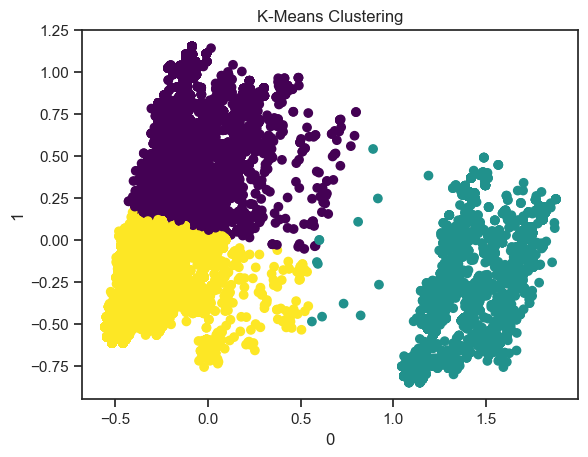

          0         1  Edad  tiempo_trab_meses  ingresos  phrs
0 -0.504677 -0.555283  22.0              121.0    2500.0  48.0
1 -0.452137 -0.136017  49.0              242.0    2400.0  60.0
2 -0.374331 -0.285166  28.0               33.0    3000.0  48.0
3 -0.181783  0.657212  44.0               66.0    2250.0  24.0
4 -0.457846 -0.615899  23.0              121.0    3000.0  40.0


In [110]:
import pandas as pd
from prince import MCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# DataFrame original
df_original = df_1.copy()

# Variables categóricas
categorical_vars = ['depto', 'Genero', 'Niv_Ed','s1_05', 'Est_Civ', 'ocupacion', 'Trabaja', 'condact']

# Lidiar con valores faltantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
df_original[categorical_vars] = imputer.fit_transform(df_original[categorical_vars])

# Lidiar con valores infinitos (inf)
df_original.replace([np.inf, -np.inf], np.nan, inplace=True)

# Realizar el Análisis de Correspondencia Múltiple (MCA) para las variables categóricas
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_original[categorical_vars])

# Combinar las variables MCA con las numéricas
combined_data = pd.concat([mca_results, df_original[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]], axis=1)

# Convertir todos los nombres de columnas a cadenas
combined_data.columns = combined_data.columns.astype(str)

# Imputar valores NaN con la media para todas las columnas numéricas
imputer = SimpleImputer(strategy='mean')
imputed_values = imputer.fit_transform(combined_data)

# Crear un DataFrame con los valores imputados
combined_data_imputed = pd.DataFrame(imputed_values, columns=combined_data.columns)

# Aplicar K-Means Clustering solo en las variables MCA
kmeans = KMeans(n_clusters=3)
# Utilizar los nombres de las columnas del MCA resultante
cluster_columns = mca_results.columns.astype(str)
combined_data_imputed['cluster'] = kmeans.fit_predict(combined_data_imputed[cluster_columns])

# Visualizar los resultados
plt.scatter(combined_data_imputed[cluster_columns[0]], combined_data_imputed[cluster_columns[1]], c=combined_data_imputed['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel(cluster_columns[0])
plt.ylabel(cluster_columns[1])
plt.show()

# Ajustar los índices antes de asignar la columna 'cluster'
combined_data = combined_data.reset_index(drop=True)

# Asegurarse de que 'cluster' esté presente en 'combined_data_imputed' antes de la asignación
if 'cluster' in combined_data_imputed.columns:
    # Asegurarse de que 'cluster' esté presente en 'combined_data' antes de la asignación
    if 'cluster' in combined_data.columns:
        combined_data['cluster'] = combined_data_imputed['cluster']

# Mostrar el DataFrame con la información del clúster
print(combined_data.head())



Composición de Clústeres para depto:
cluster      0.0  1.0   2.0  Total
depto                             
Beni         120   58   173    351
Chuquisaca   246   85   311    642
Cochabamba   351  124   487    962
La Paz       418  160   573   1151
Oruro        102   44   137    283
Pando        117   73   181    371
Potosi       186   73   242    501
Santa Cruz   433  179   574   1186
Tarija       120   39   182    341
Total       2093  835  2860   5788



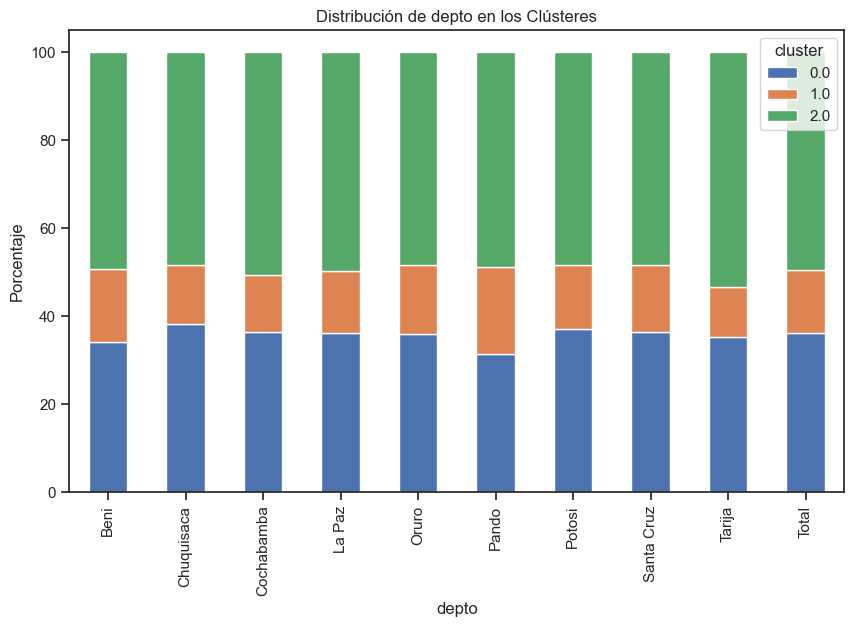


Composición de Clústeres para Genero:
cluster   0.0  1.0   2.0  Total
Genero                         
Hombre   1417  566  1929   3912
Mujer     676  269   931   1876
Total    2093  835  2860   5788



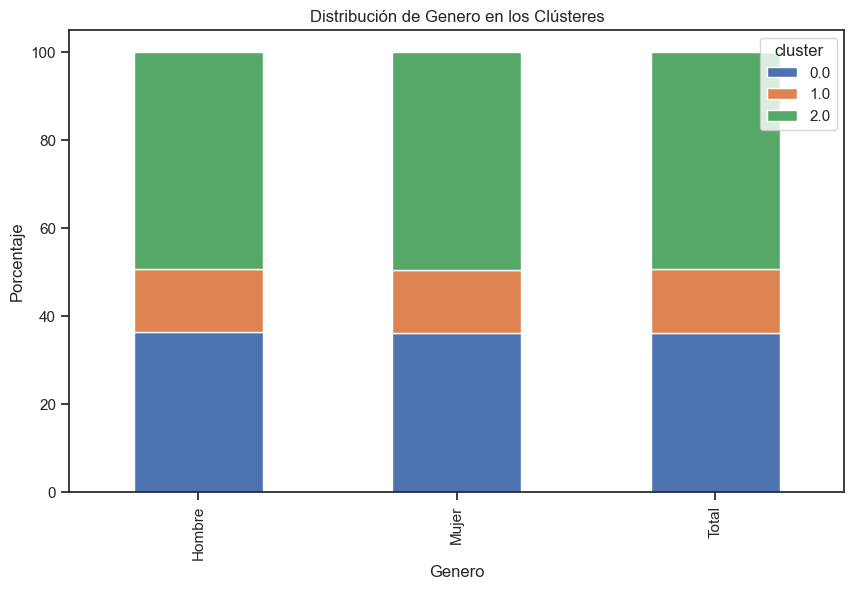


Composición de Clústeres para Niv_Ed:
cluster                 0.0  1.0   2.0  Total
Niv_Ed                                       
Ninguno                  15    1     9     25
Primaria completa       126   42   182    350
Primaria incompleta     347  145   406    898
Secundaria completa     446  195   623   1264
Secundaria incompleta   356  150   538   1044
Superior                803  302  1102   2207
Total                  2093  835  2860   5788



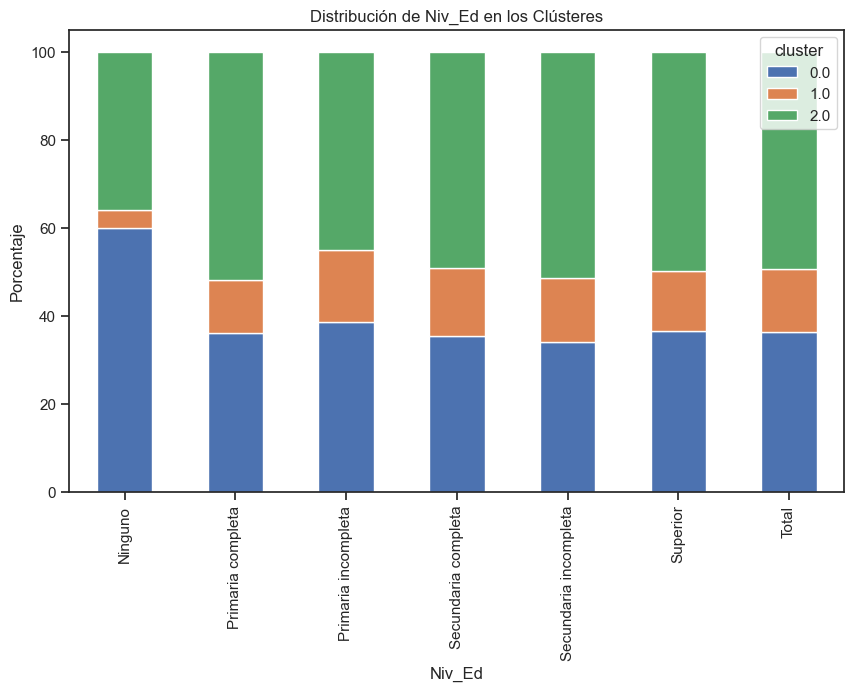


Composición de Clústeres para s1_05:
cluster                   0.0  1.0   2.0  Total
s1_05                                          
ESPOSA/O O CONVIVIENTE    320  152   433    905
HERMANO/A O CUÑADO/A       36   13    66    115
HIJO/A O ENTENADO/A       610  220   874   1704
JEFE O JEFA DEL HOGAR    1056  420  1381   2857
NIETO/NIETA                14    9    28     51
OTRO PARIENTE              10    8    23     41
OTRO QUE NO ES PARIENTE     2    1     4      7
PADRES/SUEGROS              3    1     2      6
YERNO O NUERA              42   11    49    102
Total                    2093  835  2860   5788



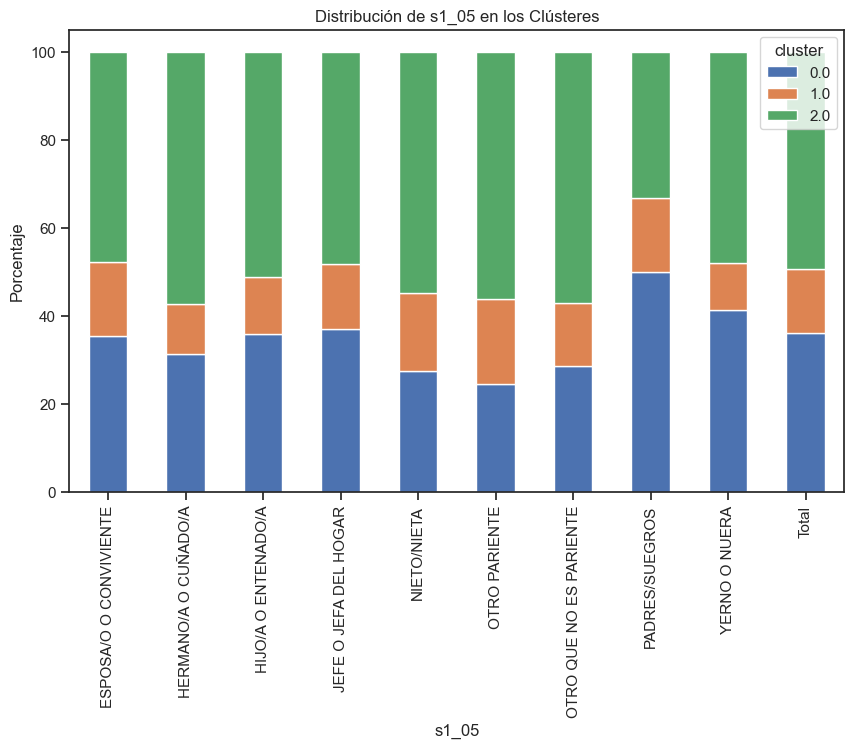


Composición de Clústeres para Est_Civ:
cluster      0.0  1.0   2.0  Total
Est_Civ                           
CASADO/A    1239  499  1658   3396
SEPARADO/A    99   48   134    281
SOLTERO/A    726  281  1032   2039
VIUDO/A       29    7    36     72
Total       2093  835  2860   5788



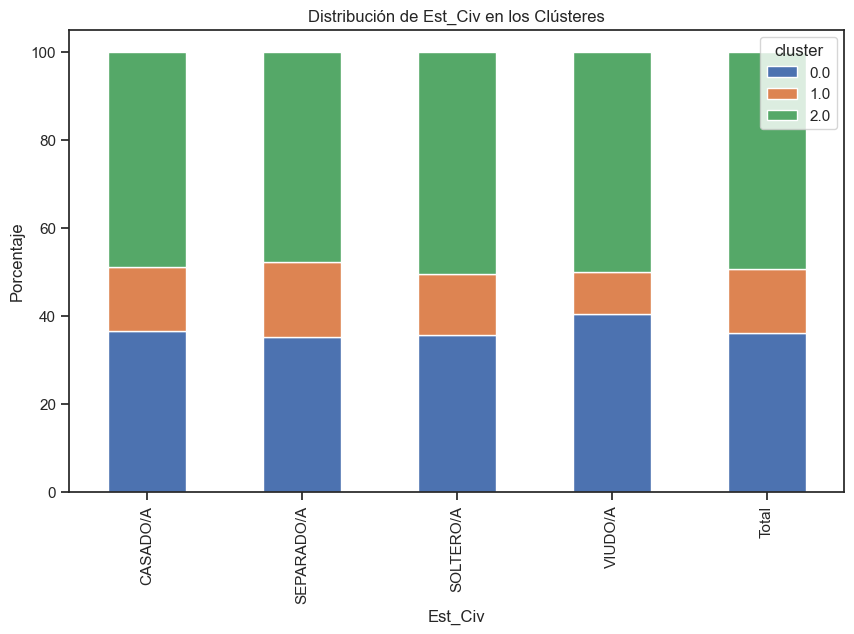


Composición de Clústeres para ocupacion:
cluster                                              0.0  1.0   2.0  Total
ocupacion                                                                 
Directivos Adm. Pública y Empresas                    54   13    66    133
Empleados de oficina                                  71   43   110    224
Fuerzas Armadas                                        1    1     6      8
Operadores de Instalaciones y Maquinarias            232  117   352    701
Otro                                                 255  105   347    707
Profesionales cientificos e intelectuales            196   68   279    543
Sin ocupacion                                        396  155   566   1117
Trabajadores de Servicio y Vendedores                255   99   333    687
Trabajadores de la Construcción, Ind. Manufactu...   569  207   732   1508
Trabajadores en Agricultura, Pecuaria,Pesca y o...    64   27    69    160
Total                                               2093  

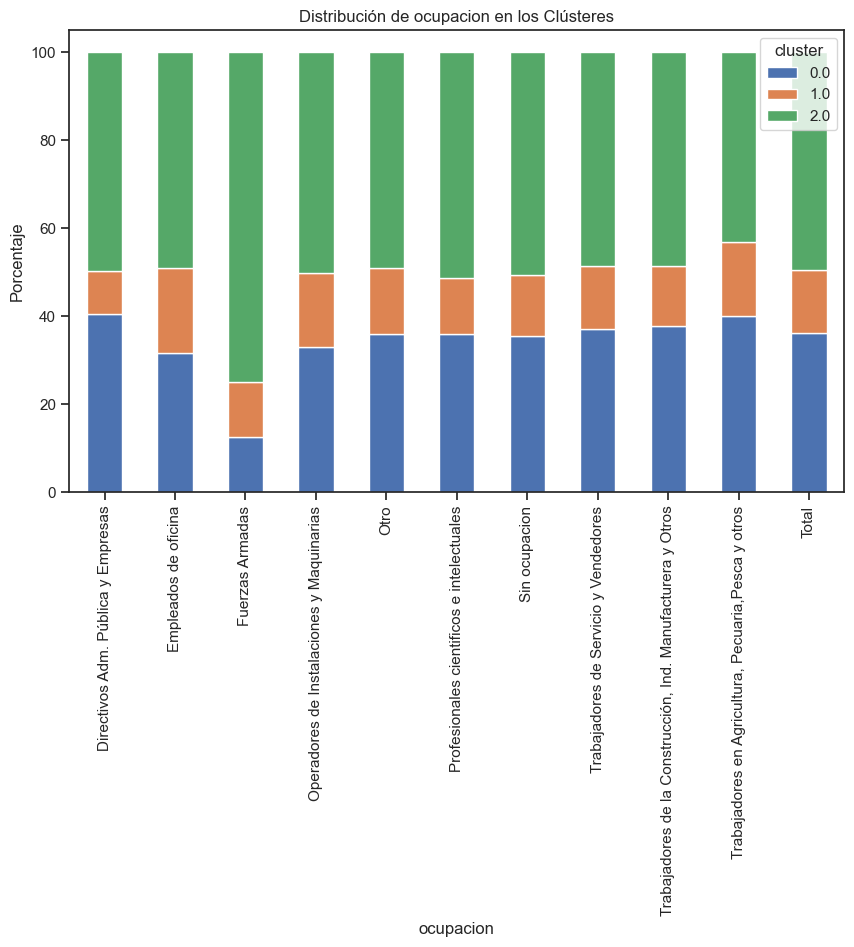


Composición de Clústeres para Trabaja:
cluster   0.0  1.0   2.0  Total
Trabaja                        
No        436  163   603   1202
Si       1657  672  2257   4586
Total    2093  835  2860   5788



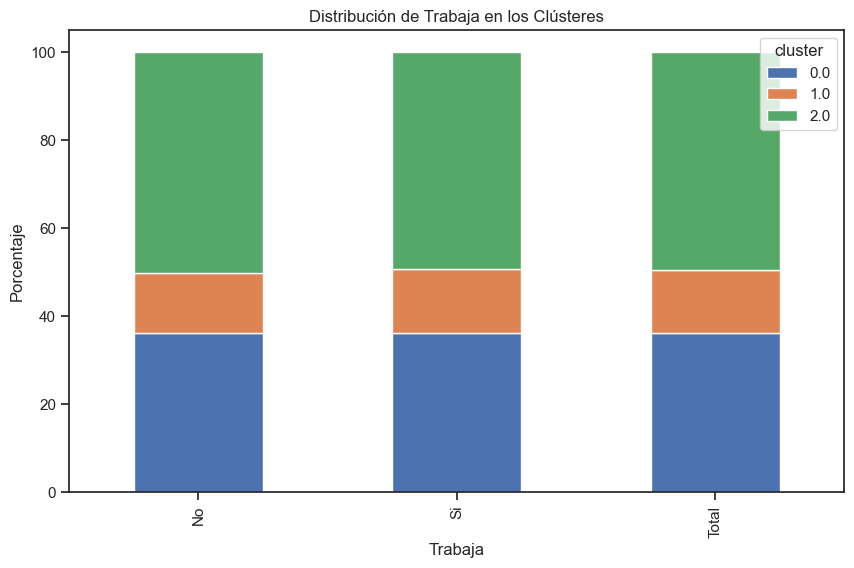


Composición de Clústeres para condact:
cluster     0.0  1.0   2.0  Total
condact                          
Aspirante    66   23   100    189
Cesante     330  132   467    929
Ocupado    1697  680  2293   4670
Total      2093  835  2860   5788



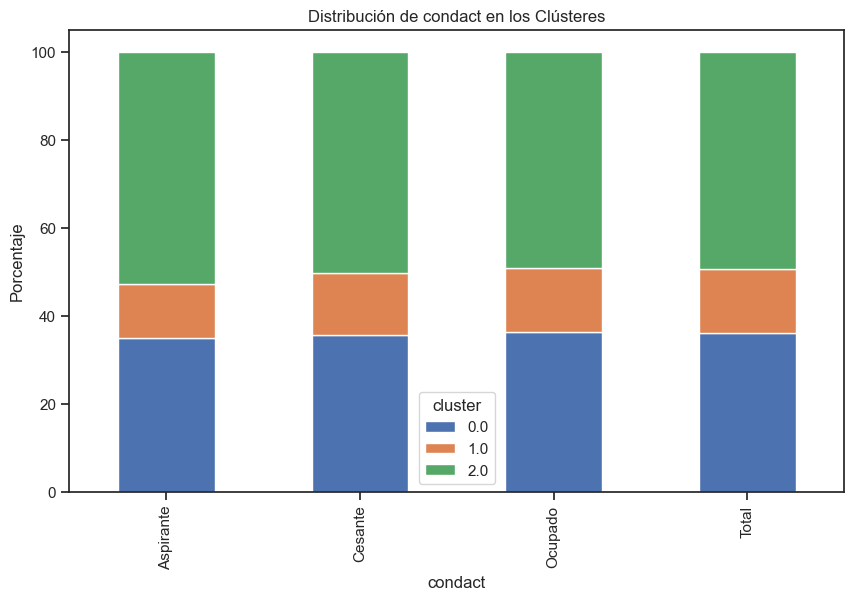

In [111]:
# Crear un DataFrame con las variables categóricas y la información del clúster
cluster_info = pd.concat([df_original[categorical_vars], combined_data_imputed['cluster']], axis=1)

# Analizar la composición de clústeres con respecto a variables categóricas
for var in categorical_vars:
    cross_tab = pd.crosstab(cluster_info[var], cluster_info['cluster'], margins=True, margins_name='Total')
    print(f"\nComposición de Clústeres para {var}:\n{cross_tab}\n")

    # Graficar barras apiladas
    cross_tab_percentage = cross_tab.div(cross_tab['Total'], axis=0) * 100
    cross_tab_percentage.drop('Total', axis=1, inplace=True)
    cross_tab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Distribución de {var} en los Clústeres')
    plt.xlabel(var)
    plt.ylabel('Porcentaje')
    plt.show()


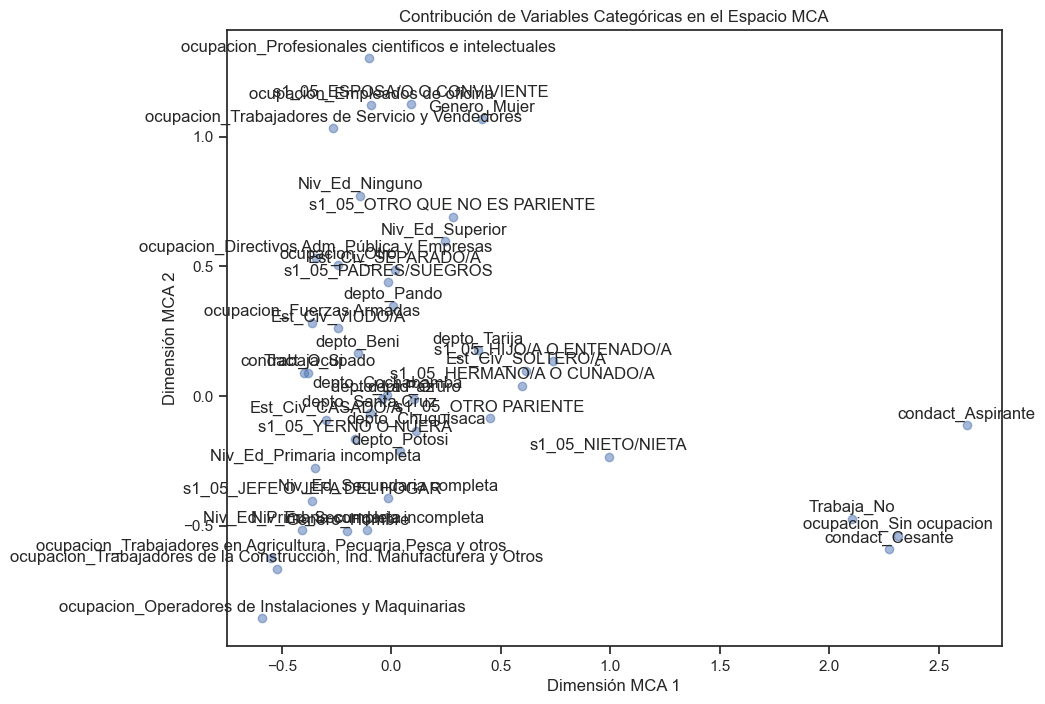

In [112]:
# Obtén las coordenadas de las categorías en las dimensiones MCA
category_coordinates = mca.column_coordinates(df_original[categorical_vars])

# Visualiza la contribución de las variables categóricas en el espacio MCA
plt.figure(figsize=(10, 8))
plt.scatter(category_coordinates.iloc[:, 0], category_coordinates.iloc[:, 1], alpha=0.5)
plt.title('Contribución de Variables Categóricas en el Espacio MCA')
plt.xlabel('Dimensión MCA 1')
plt.ylabel('Dimensión MCA 2')
for category, (x, y) in category_coordinates.iterrows():
    plt.annotate(category, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()


In [113]:
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, v_measure_score
from sklearn.preprocessing import LabelEncoder

# Codifica las etiquetas categóricas si es necesario
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(combined_data_imputed['cluster'])

# Inercia (menor es mejor)
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Puntuación de silueta (mayor es mejor)
silhouette_avg = silhouette_score(combined_data_imputed[cluster_columns], combined_data_imputed['cluster'])
print(f"Puntuación de silueta: {silhouette_avg}")

# Completitud, homogeneidad y puntuación V (mayor es mejor)
completeness = completeness_score(true_labels, combined_data_imputed['cluster'])
homogeneity = homogeneity_score(true_labels, combined_data_imputed['cluster'])
v_measure = v_measure_score(true_labels, combined_data_imputed['cluster'])

print(f"Completitud: {completeness}")
print(f"Homogeneidad: {homogeneity}")
print(f"Puntuación V: {v_measure}")


Inercia: 2911.3626828491438
Puntuación de silueta: 0.6092342935495969
Completitud: 1.0
Homogeneidad: 1.0
Puntuación V: 1.0


In [114]:
import scipy.stats as stats

# Lista de variables categóricas
categorical_variables = ['depto', 'peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'Cont_Trab',
                          'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra', 'ingresos_categoria',
                          'tiempo_trab_categoria', 'phrs_categoria', 'Nacionalidad']

# Realizar la prueba de chi-cuadrado para cada variable
for variable in categorical_variables:
    # Verificar si la variable está presente en el DataFrame
    if variable in df_1.columns:
        # Obtener los datos
        data = df_1[variable]

        # Realizar la prueba de chi-cuadrado con corrección
        obs = data.value_counts().sort_values(ascending=False)  # Obtener las frecuencias observadas
        chi2, p, dof, expected = stats.chi2_contingency(obs + 0.5)

        # Imprimir los resultados
        print(f"Variable: {variable}")
        print(f"Estadístico de chi-cuadrado: {chi2}")
        print(f"Valor p: {p}")
        print("\n")
    else:
        print(f"La variable '{variable}' no está presente en el DataFrame.")


Variable: depto
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: peao
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Genero
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: s1_05
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Niv_Ed
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Est_Civ
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: ocupacion
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Trabaja
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Cont_Trab
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: condact
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Segundo_Trab
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Aporta_Hog
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: pagos_extra
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: ingresos_categoria
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: tiempo_trab_categoria
Estadístico de chi-cuadrad

In [115]:

columns_to_drop = ["Nacionalidad", 'Segundo_Trab', 'pagos_extra', 'ingresos', 'tiempo_trab_meses', 'phrs']
df_1 = df_1.drop(columns=columns_to_drop)


In [116]:
df_1.columns


Index(['gestion', 'trimestre', 'id_persona', 'depto', 'peao', 'Genero', 'Edad',
       's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'Cont_Trab',
       'condact', 'Aporta_Hog', 'tasa_desempleo', 'ingresos_categoria',
       'tiempo_trab_categoria', 'phrs_categoria'],
      dtype='object')

## Transformacion One hot encoding

In [117]:
import pandas as pd

categorical_columns = ['peao','depto', 'Genero', 'Cont_Trab', 's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'condact', 'Aporta_Hog', 'ingresos_categoria','tiempo_trab_categoria','phrs_categoria']
       

# Aplicar One-Hot Encoding a las variables categóricas
df_enc = pd.get_dummies(df_1, columns=categorical_columns, drop_first=True)

# Asegurarse de manejar correctamente las variables objetivo
X_enc = df_enc.drop('tasa_desempleo', axis=1)
y_enc = df_enc['tasa_desempleo']

# Continuar con el entrenamiento del modelo utilizando X_enc y y_enc

df_enc.head()

,gestion,trimestre,id_persona,Edad,tasa_desempleo,peao_Si,depto_Chuquisaca,depto_Cochabamba,depto_La Paz,depto_Oruro,...,Aporta_Hog_Si,ingresos_categoria_Bajo,ingresos_categoria_Medio,ingresos_categoria_Alto,tiempo_trab_categoria_Corto,tiempo_trab_categoria_Medio,tiempo_trab_categoria_Largo,phrs_categoria_Parcial,phrs_categoria_Completo,phrs_categoria_Extra
1,2016,3,582156,22.0,4.02,True,False,False,False,False,...,True,True,False,False,False,False,True,False,True,False
3,2016,3,582173,49.0,4.02,True,False,False,False,False,...,True,True,False,False,False,False,True,False,False,True
6,2016,3,582195,28.0,4.02,True,False,False,False,False,...,True,False,True,False,False,True,False,False,True,False
9,2016,3,582200,44.0,4.02,True,False,False,False,False,...,True,True,False,False,False,True,False,True,False,False
17,2016,3,582226,23.0,4.02,True,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False


In [118]:
# Guardar el DataFrame en un archivo CSV
df_enc.to_csv('df_3t_encoded.csv', index=False)
 # El parámetro index=False evita que se escriba el índice en el archivo.

In [119]:
dimensiones =df_enc.shape
# Imprimir el número de filas y columnas
print(f"Número de filas: {dimensiones[0]}")
print(f"Número de columnas: {dimensiones[1]}")

Número de filas: 30085
Número de columnas: 54
